# Plotting the variables for ensemble runs

Notes: 
+ enabled reading data on Baseline


## Tips Baseline
1. Use *pyces* env
2. 

In [2]:
import os,glob
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import socket
#yimport pyreadr # to read .rds files

## Some Useful functions


In [3]:
def print_dict_tree(d, indent=0):
    """
    Print the tree of the dictionary
    """
    for key, value in d.items():
        print(' ' * indent + str(key))
        if isinstance(value, dict):
            print_dict_tree(value, indent + 4)

### Check which machine you are on! The path names will vary accordingly

In [4]:
machine_name = socket.gethostname()
if "baseline" in machine_name:
    print("We are on: baseline")

elif "or-slurm" in machine_name:
    print ("We are on: cades")

elif "MAC132004" in machine_name:
    print("We are on: macbook")
else:
    print("other than baseline, cades, or LAB macbook")


We are on: baseline


Copy all the fates_parameter files from ad_spinup run dir to following path. 
Use `rsync_params.sh`!

In [5]:
# Paths
if "baseline" in machine_name:
    path_params_head = "/gpfs/wolf2/cades/cli185/scratch/ud4/FATES_Outputs/runs/UQ/params/"
    path_processed_head = "/gpfs/wolf2/cades/cli185/scratch/ud4/FATES_Outputs/runs/"
    path_ensemble_vals = "/ccsopen/home/ud4/models/OLMT/data/lnd/clm2/paramdata/ensemble/"

if "MAC132004" in machine_name:
    path_params_head = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/UQ/params/"
    path_processed_head = "/Users/ud4/FATESMDS_analysis/outputs/runs/tests_alp/2024/"

In [6]:
N_ensembles=10

params_list = ["fates_cnp_vmax_nh4","fates_cnp_vmax_no3","fates_cnp_vmax_p"]

In [7]:
# Path to save results

path_save = "/gpfs/wolf2/cades/cli185/scratch/ud4/Results/EN_Vmax/"

In [8]:

fnames={} # processed data
fnames_params={} # processed data
#FACE_1PFT_AllomBlVmax_r240424_woL2FR_CONew_enVmax_ECA_processed

#case_id = "FACE_1PFT_AllomBl_r240503_woL2FR_CONew_enVmax"
case_id = "FACE_1PFT_AllomBl_r240505_woL2FRf_CONew_enVmax"
#case_id = "FACE_1PFT_AllomBl_r240505_woL2FRf_CONew_enVmax_RD"
#case_id = "FACE_1PFT_AllomBl_r240505_woL2FRf_CONew_enVmax_ECA"
case_id = "FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD"
sites= ("US-ORN", "US-DUK")
#sites= ("US-ORN",)#, "US-DUK")
for site in sites:
    fnames_params[site] = {}
    for idx in range(int(N_ensembles)):
        # C-Only
        i= idx+1
        fnames[f"{case_id}_{site}_spins_g{i:05d}"] = f"{path_processed_head}{case_id}_processed/{case_id}_{site}_spins_g{i:05d}.nc"
        fnames_params[site][f"{case_id}_{site}_spins_g{i:05d}"] = f"{path_params_head}{case_id}_{site}_I1850ELMFATES_ad_spinup/fates_params_{i:05d}.nc"


if params error  add the case dir in `case_params_copy.txt` <br>
then run `rsync_params.sh`

In [9]:
ds_params = {}
dict_params = {} # to store the params values

for site in sites:
    dict_params[site] = {}
    for parm in params_list:
        dict_params[site][parm] = []

for site in sites:
    for idx, key in enumerate(fnames_params[site].keys()):
        #print (key)
        ds_params[key] = xr.open_mfdataset(fnames_params[site][key], decode_times=False)
        # making list of param values
        for parm in params_list:
            #print (f"{key}: {ds_params[key][parm].values[0]} ")
            dict_params[site][parm].append(ds_params[key][parm].values[0])



In [10]:
dict_params[site][parm]

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1]

        fates_cnp_vmax_nh4  fates_cnp_vmax_no3  fates_cnp_vmax_p
g00001        1.000000e-10        1.000000e-10      1.000000e-10
g00002        1.000000e-09        1.000000e-09      1.000000e-09
g00003        1.000000e-08        1.000000e-08      1.000000e-08
g00004        1.000000e-07        1.000000e-07      1.000000e-07
g00005        1.000000e-06        1.000000e-06      1.000000e-06
g00006        1.000000e-05        1.000000e-05      1.000000e-05
g00007        1.000000e-04        1.000000e-04      1.000000e-04
g00008        1.000000e-03        1.000000e-03      1.000000e-03
g00009        1.000000e-02        1.000000e-02      1.000000e-02
g00010        1.000000e-01        1.000000e-01      1.000000e-01


/tmp/ipykernel_968265/4020978039.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_params = pd.read_csv(f'{path_ensemble_vals}bs_Vmax3_parm_vals',


<Figure size 1500x500 with 0 Axes>

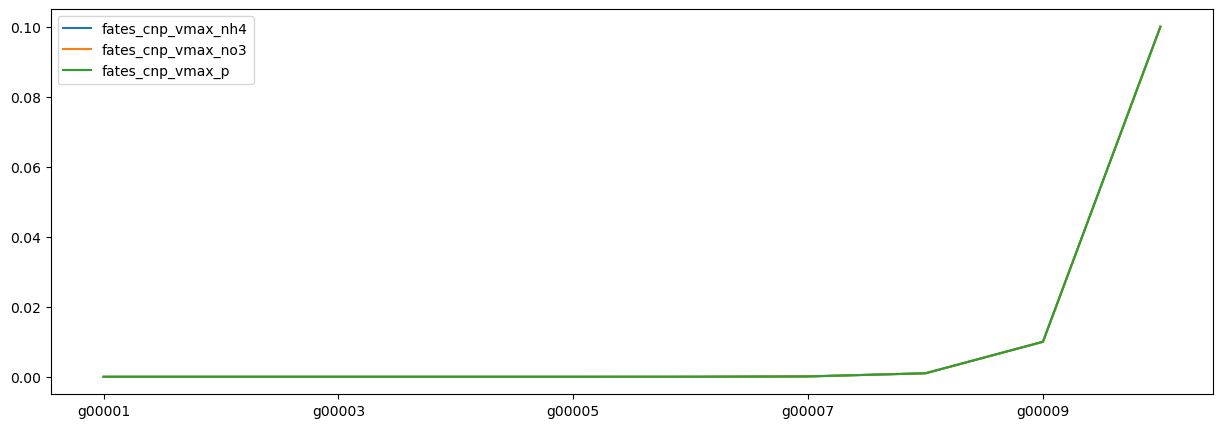

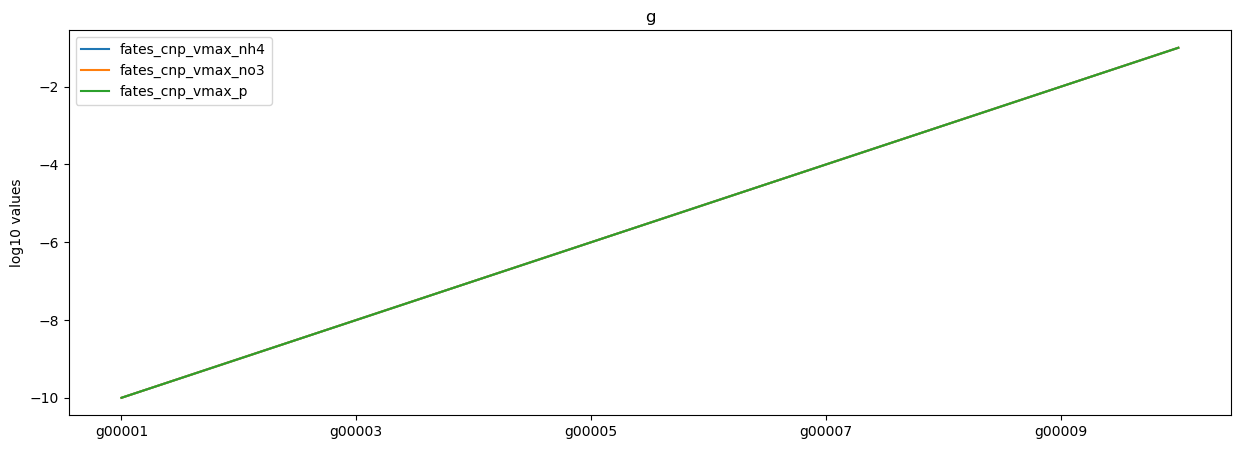

In [11]:

import pandas as pd

# Replace 'file.txt' with the path to your text file
df_params = pd.read_csv(f'{path_ensemble_vals}bs_Vmax3_parm_vals',
                        names= params_list,
                        delim_whitespace=True)
df_params.index = ['g{:05d}'.format(i+1) for i in range(len(df_params))]

# Display the DataFrame
print(df_params)

plt.figure(figsize=(15,5))
df_params.plot(figsize=(15,5))

# Take the logarithm base 10 of the DataFrame values
df_log10 = np.log10(df_params)

# Plot the columns

df_log10.plot(figsize=(15,5),title="g")
plt.ylabel('log10 values')
plt.savefig(f"{path_save}/Params_en.png")



In [12]:
# Making a dataframe that will store the sum of first 20 years of GPP.



In [13]:
# extracting the timeseries of variables for selected variables and sites
dict_vars_data = {}
# also add the sum of n years of variable for sensitivity analysis
sum_n_years= 20
dict_param_sum_var = {}


variables = ["FATES_GPP",
             "FATES_NPP"]
for var in variables:
    dict_vars_data[var] = {}
    dict_param_sum_var[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        dict_param_sum_var[var] [site]={}
        dict_param_sum_var [var] [site] = df_params.copy(deep=True)
        for key in fnames.keys():
            if site in key: # Storing the ORNL and Duke data separately
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]
                sum_var = dict_vars_data[var][site][key.split("_")[-1]][:sum_n_years].sum().values
                dict_param_sum_var [var] [site] .loc [key.split("_")[-1], f"Sum_{var}"]  =  sum_var




R-squared for fates_cnp_vmax_nh4: -0.44196894747075444
R-squared for fates_cnp_vmax_no3: -0.44196894747075444
R-squared for fates_cnp_vmax_p: -0.44196894747075444
Coefficient for fates_cnp_vmax_nh4: [9.96871699e-11]
Coefficient for fates_cnp_vmax_no3: [9.96871699e-11]
Coefficient for fates_cnp_vmax_p: [9.96871699e-11]


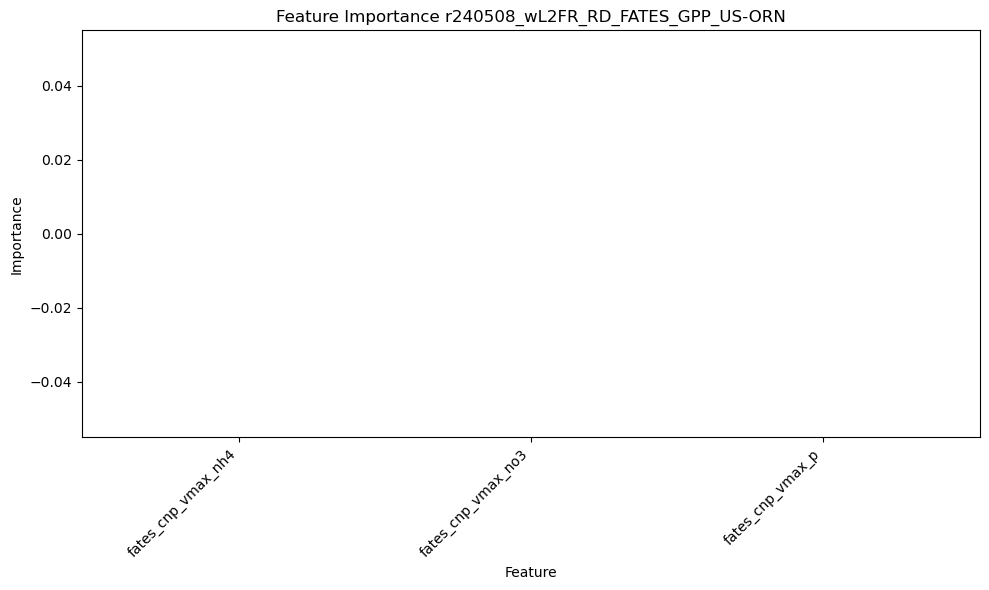

R-squared for fates_cnp_vmax_nh4: -0.4567491934605479
R-squared for fates_cnp_vmax_no3: -0.4567491934605479
R-squared for fates_cnp_vmax_p: -0.4567491934605479
Coefficient for fates_cnp_vmax_nh4: [9.35267966e-13]
Coefficient for fates_cnp_vmax_no3: [9.35267966e-13]
Coefficient for fates_cnp_vmax_p: [9.35267966e-13]


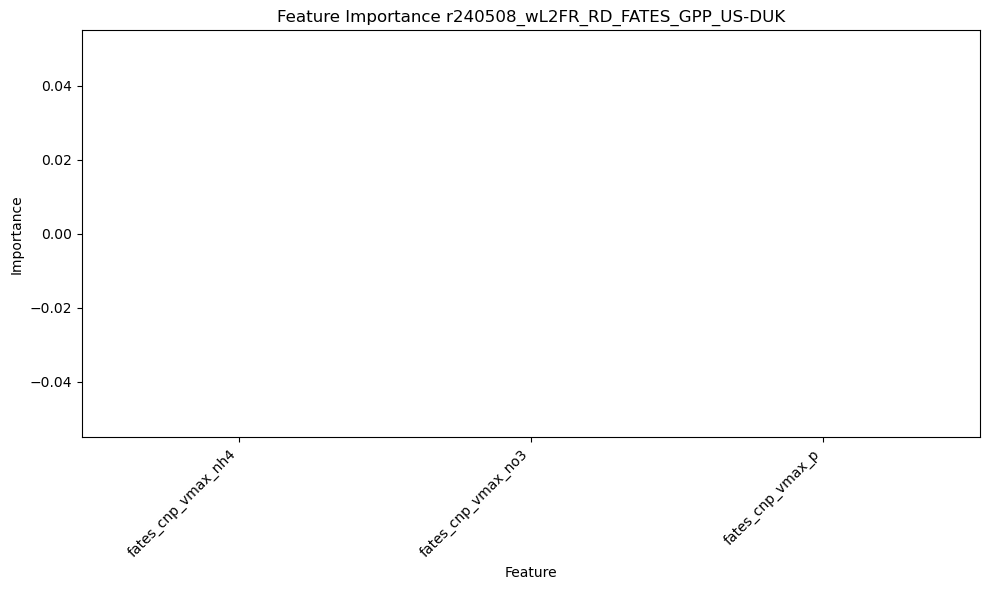

R-squared for fates_cnp_vmax_nh4: -0.46376535549077014
R-squared for fates_cnp_vmax_no3: -0.46376535549077014
R-squared for fates_cnp_vmax_p: -0.46376535549077014
Coefficient for fates_cnp_vmax_nh4: [5.95930169e-11]
Coefficient for fates_cnp_vmax_no3: [5.95930169e-11]
Coefficient for fates_cnp_vmax_p: [5.95930169e-11]


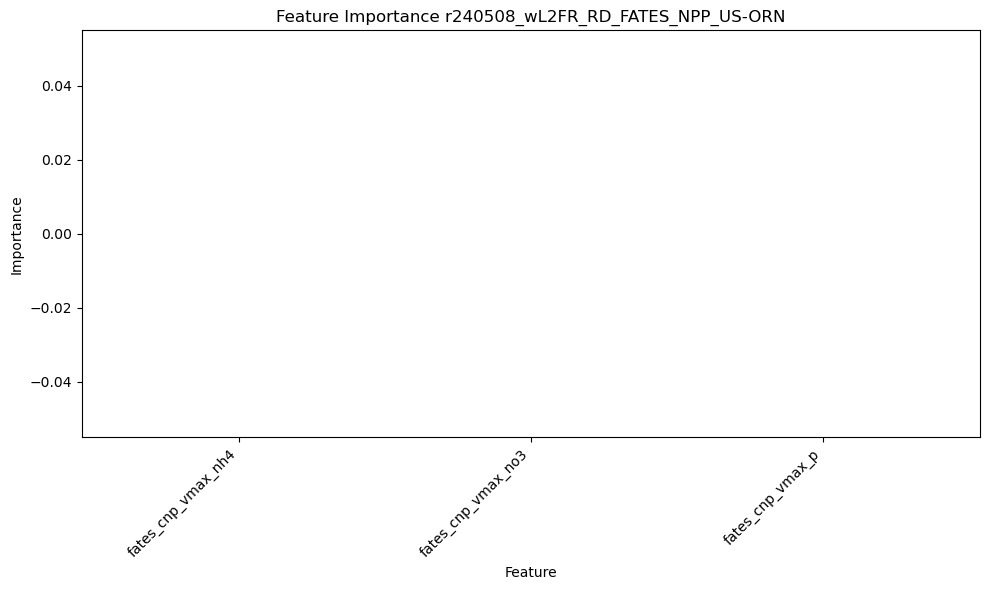

R-squared for fates_cnp_vmax_nh4: -0.4567340110035123
R-squared for fates_cnp_vmax_no3: -0.4567340110035123
R-squared for fates_cnp_vmax_p: -0.4567340110035123
Coefficient for fates_cnp_vmax_nh4: [7.19214747e-13]
Coefficient for fates_cnp_vmax_no3: [7.19214747e-13]
Coefficient for fates_cnp_vmax_p: [7.19214747e-13]


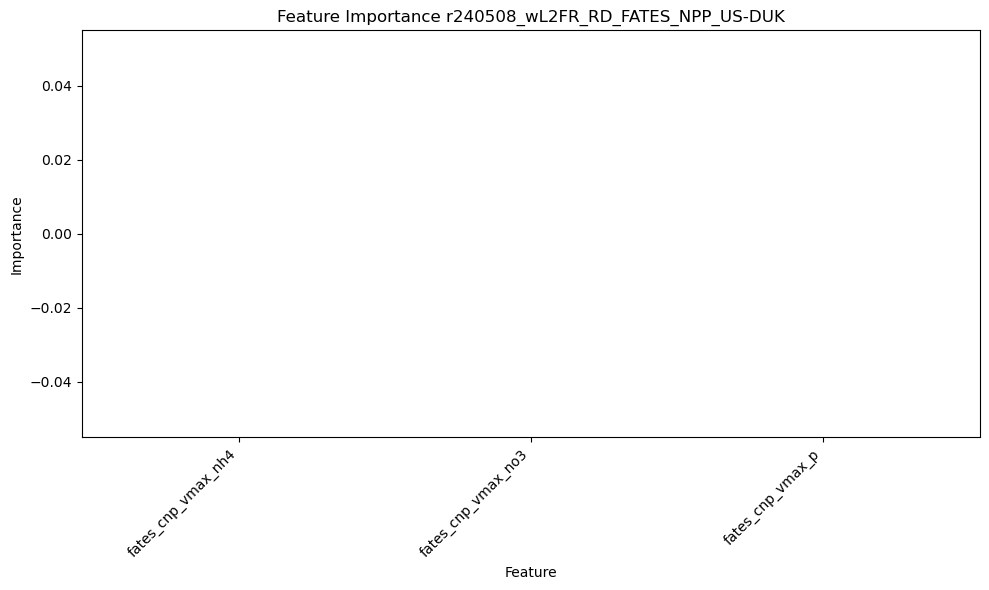

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#var = "FATES_GPP"
#site = "US-ORN"
for var in variables:
    for site in sites:
        df = dict_param_sum_var [var] [site].copy(deep =True)

        # Split dataset into features (parameters) and target variable (output)
        X = df[params_list]  # Features
        y = df[f"Sum_{var}"]  # Target variable

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit regression models for each parameter separately
        models = {}
        for param in X.columns:
            # Choose a regression model (e.g., Linear Regression, Random Forest)
            model = LinearRegression()  # Change this to RandomForestRegressor() for Random Forest

            # Fit the model
            model.fit(X_train[[param]], y_train)

            # Store the model
            models[param] = model

        # Evaluate model performance (e.g., R-squared)
        for param, model in models.items():
            score = model.score(X_test[[param]], y_test)
            print(f'R-squared for {param}: {score}')

        # Compare coefficients or feature importances
        for param, model in models.items():
            if isinstance(model, LinearRegression):
                print(f'Coefficient for {param}: {model.coef_}')
            elif isinstance(model, RandomForestRegressor):
                print(f'Feature importance for {param}: {model.feature_importances_}')
        # Assuming X_train and y_train are your training data
        # Train a RandomForestRegressor model
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        # Get feature importances from the trained model
        feature_importances = model.feature_importances_

        # Create a DataFrame to store feature importances
        importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

        # Sort the DataFrame by importance values
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        tmp_case_name = "_".join([case_id.split("_")[3],case_id.split("_")[4],case_id.split("_")[-1]])

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance {tmp_case_name}_{var}_{site}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig(f"{path_save}/Sensivity_{tmp_case_name}_{var}_{site}.png")
        plt.show()


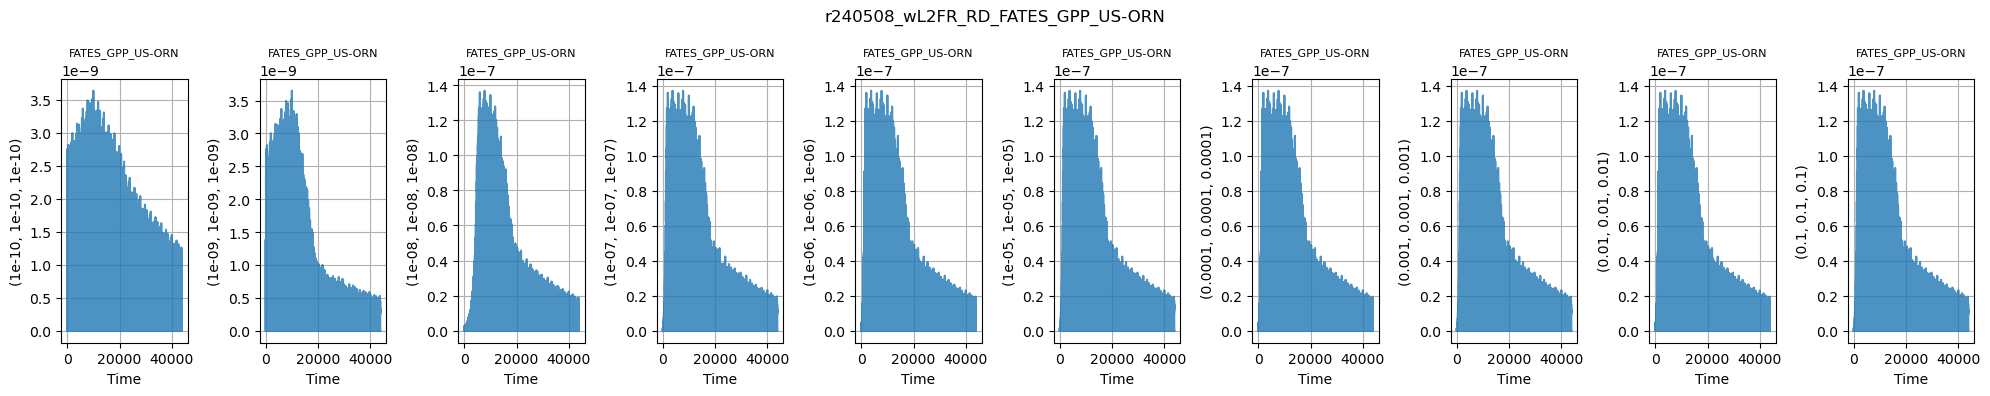

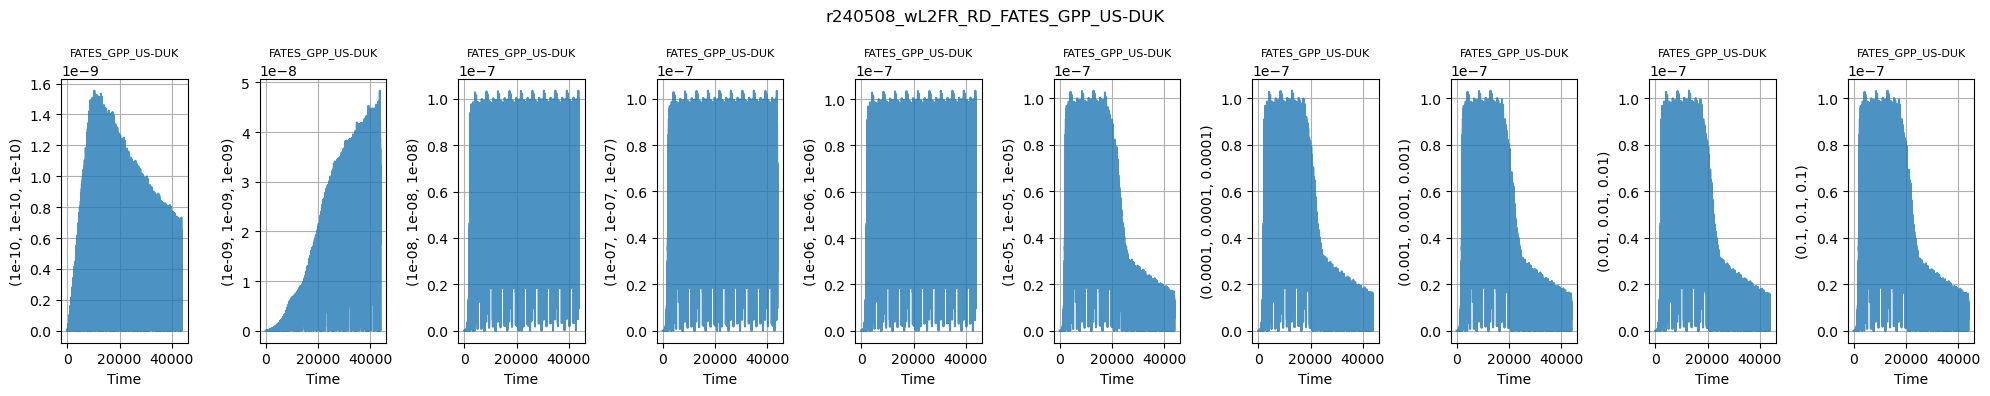

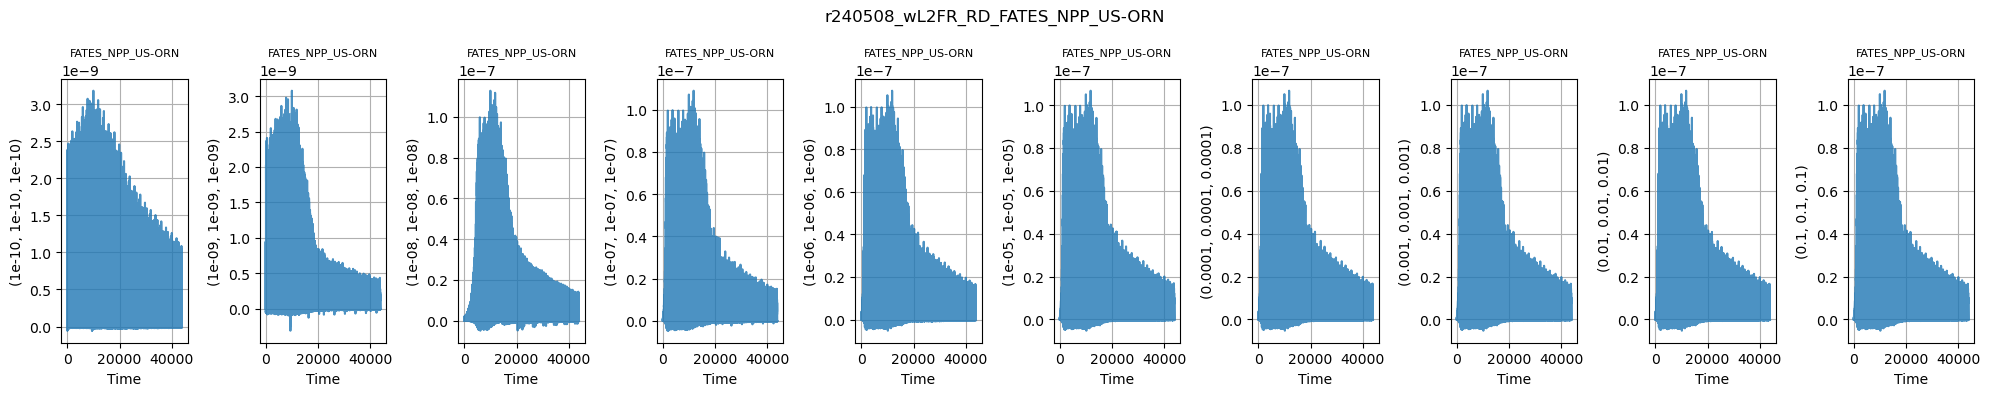

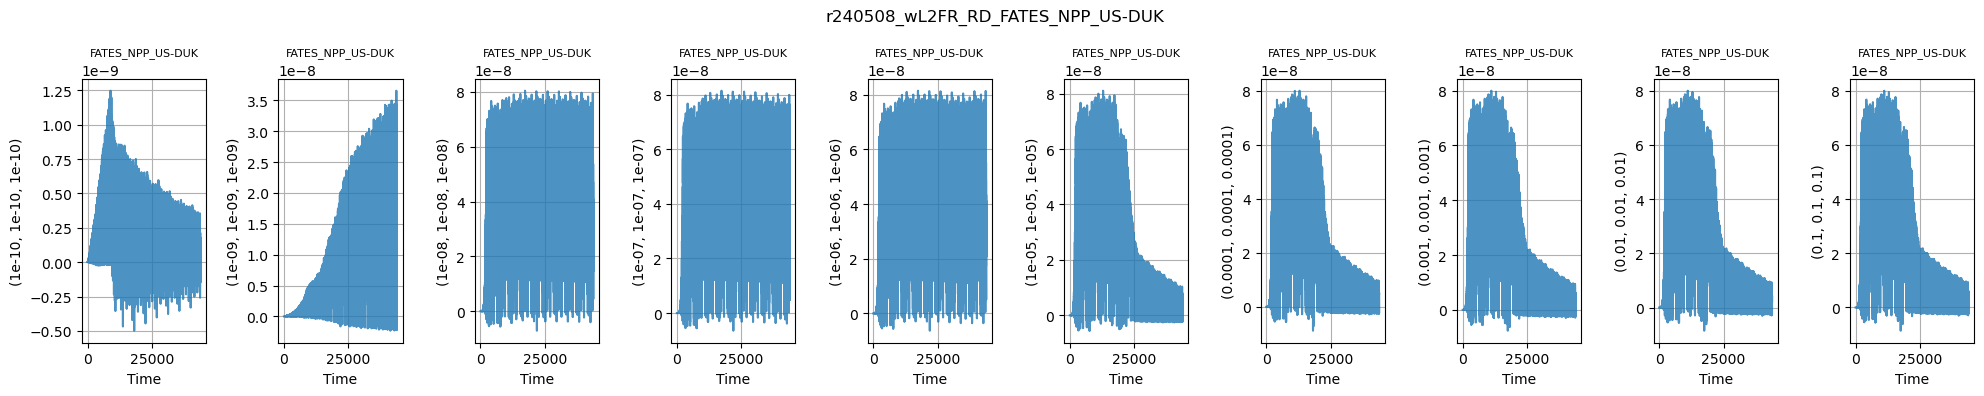

In [15]:
if "r240508"  in case_id:
    for var in variables:
        for site in sites:
            df = dict_param_sum_var [var] [site].copy(deep =True)
            marker_styles = ['o', 's', '^', 'D', 'x', '*']
            fig, axes = plt.subplots(1, 10, figsize=(20, 4))
            for idx_row, index_row in enumerate (df.index):
                p1 = df.loc[index_row,"fates_cnp_vmax_nh4"]
                p2 = df.loc[index_row,"fates_cnp_vmax_no3"]
                p3 = df.loc[index_row,"fates_cnp_vmax_p"]
                subset = df_params[(df_params[params_list[0]] == p1) &
                                            (df_params[params_list[1]] == p2) &
                                            (df_params[params_list[2]] == p3)]
                #for i, ax in enumerate(axes):
                ax = axes[idx_row]
                ax.plot(dict_vars_data[var][site][subset.index[0]], label=f'{(p1,p2,p3)}', alpha =0.8)
                ax.set_title(f'{var}_{site}',fontsize=8)
                ax.set_xlabel('Time')
                ax.set_ylabel(f'{(p1,p2,p3)}')
                ax.grid(True)
                #ax.legend()

            plt.suptitle(f'{tmp_case_name}_{var}_{site}')
            #plt.xlabel('Index')
            #plt.ylabel('Output Variable')
            #plt.legend()
            #plt.grid(True)
            plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{var}_{site}.png")
            plt.tight_layout()
            plt.show()


In [16]:
df_params

,fates_cnp_vmax_nh4,fates_cnp_vmax_no3,fates_cnp_vmax_p
g00001,1.000000e-10,1.000000e-10,1.000000e-10
g00002,1.000000e-09,1.000000e-09,1.000000e-09
g00003,1.000000e-08,1.000000e-08,1.000000e-08
g00004,1.000000e-07,1.000000e-07,1.000000e-07
g00005,1.000000e-06,1.000000e-06,1.000000e-06
g00006,1.000000e-05,1.000000e-05,1.000000e-05
g00007,1.000000e-04,1.000000e-04,1.000000e-04
g00008,1.000000e-03,1.000000e-03,1.000000e-03
g00009,1.000000e-02,1.000000e-02,1.000000e-02
g00010,1.000000e-01,1.000000e-01,1.000000e-01


In [17]:
if "r240508"  not in case_id:
    for var in variables:
        for site in sites:
            df = dict_param_sum_var [var] [site].copy(deep =True)
            marker_styles = ['o', 's', '^', 'D', 'x', '*']
            plt.figure(figsize=(8, 6))
            count = 0
            for p1 in df_params[params_list[0]].unique():
                for p2 in df_params[params_list[1]].unique():
                    for idx_p3, p3 in enumerate (df_params[params_list[2]].unique()):
                        subset = df_params[(df_params[params_list[0]] == p1) &
                                            (df_params[params_list[1]] == p2) &
                                            (df_params[params_list[2]] == p3)]
                        plt.plot(dict_vars_data[var][site][subset.index[0]], marker = marker_styles[idx_p3], label=f'{(p1,p2,p3)}', alpha =0.5)
                        count+=1
            plt.title(f'{tmp_case_name}_{var}_{site}')
            plt.xlabel('Index')
            plt.ylabel('Output Variable')
            #plt.legend()
            plt.grid(True)
            plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{var}_{site}.png")
            plt.show()
            print (count)

#print (params_list)
for var in variables:
    for site in sites:
        df = dict_param_sum_var [var] [site].copy(deep =True)
        marker_styles = ['o', 's', '^', 'D', 'x', '*']
        count = 0
        for idx_p1, p1 in enumerate (df_params[params_list[0]].unique()):
            for idx_p2, p2 in enumerate(df_params[params_list[1]].unique()):
                for idx_p3, p3 in enumerate (df_params[params_list[2]].unique()):
                    plt.figure(figsize=(8, 6))
                    subset = df_params[(df_params[params_list[0]] == p1) &
                                        (df_params[params_list[1]] == p2) &
                                        (df_params[params_list[2]] == p3)]
                    plt.plot(dict_vars_data[var][site][subset.index[0]], marker = marker_styles[idx_p3], label=f'{(p1,p2,p3)}', alpha =0.5)
                    count+=1
                    plt.title(f'{tmp_case_name}_{var}_{site}')
                    plt.xlabel('Index')
                    plt.ylabel('Output Variable')
                    plt.legend()
                    plt.ylim(0,1e-7)
                    plt.grid(True)
                    #plt.savefig(f"{path_save}/TS_{tmp_case_name}_{var}_{site}_{subset.index[0]}.png")
                    #plt.show()
        print (var, site, count)

In [18]:
subset.index[0]

'g00010'

In [19]:
if "r240508"  not in case_id:

    df = dict_param_sum_var [var] [site].copy(deep =True)
    marker_styles = ['o', 's', '^', 'D', 'x', '*']
    for p1 in df_params[params_list[0]].unique():
        for p2 in df_params[params_list[1]].unique():
            plt.figure(figsize=(8, 6))
            for idx_p3, p3 in enumerate (df_params[params_list[2]].unique()):
                subset = df_params[(df_params[params_list[0]] == p1) &
                                    (df_params[params_list[1]] == p2) &
                                    (df_params[params_list[2]] == p3)]
                plt.plot(dict_vars_data[var][site][subset.index[0]], marker = marker_styles[idx_p3], label=f'{(p1,p2,p3)}', alpha =0.5)
            plt.title(f'Output Variable vs. Parameter1 (Param1={p3})')
            plt.xlabel('Index')
            plt.ylabel('Output Variable')
            plt.legend()
            plt.grid(True)
            plt.show()


In [20]:
if "r240508"  not in case_id:
    df = dict_param_sum_var [var] [site].copy(deep =True)
    marker_styles = ['o', 's', '^', 'D', 'x', '*']
    for p1 in df_params[params_list[0]].unique():
        for p2 in df_params[params_list[1]].unique():
            plt.figure(figsize=(8, 6))
            for idx_p3, p3 in enumerate (df_params[params_list[2]].unique()):
                subset = df[(df_params[params_list[0]] == p1) &
                                    (df_params[params_list[1]] == p2)]
            plt.plot(subset [params_list[2]], subset [f"Sum_{var}"],label=f'{(p1,p2)}',  alpha =0.5)
            plt.legend()
            plt.yscale('log')
            plt.xscale('log')
            plt.title(f'Output Variable vs. Parameter1 (Param1={p3})')
            plt.xlabel('params_list[2]')

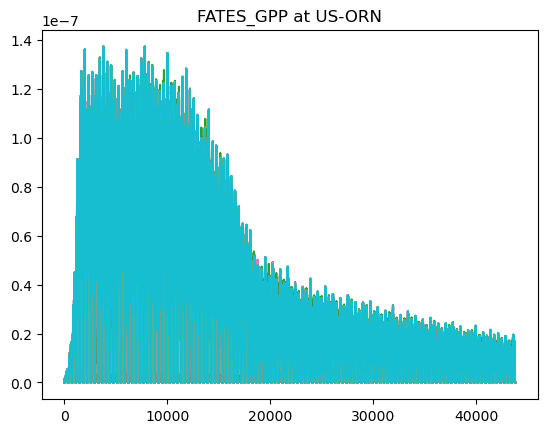

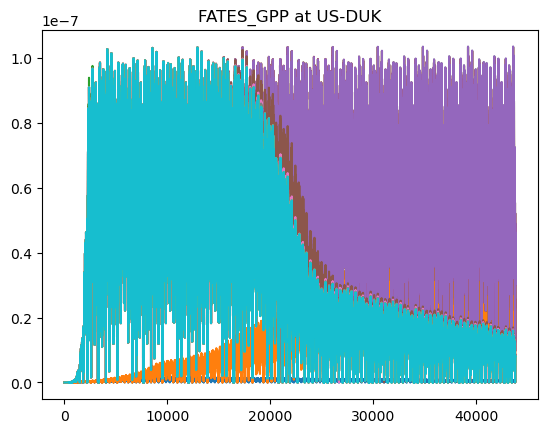

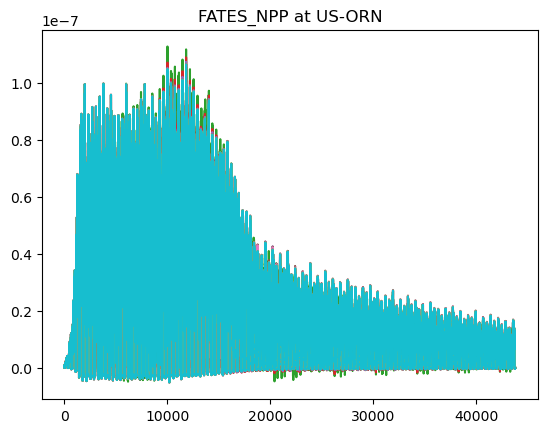

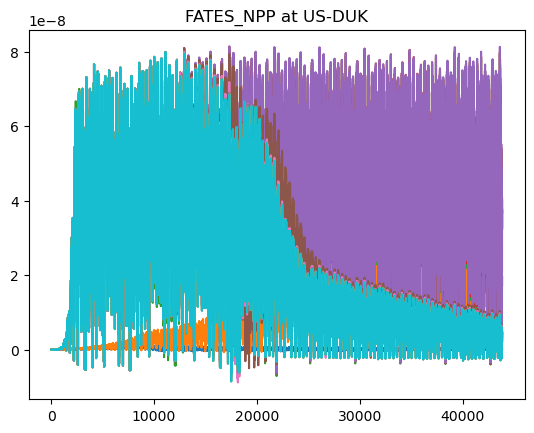

In [21]:
for var in variables:
    for site in sites:
        fig, ax = plt.subplots()
        for key in fnames.keys():
            if site in key:
                data = dict_vars_data[var][site][key.split("_")[-1]]
                ax.plot(data, label=key.split("_")[-1])
        ax.set_title(f"{var} at {site}")
        plt.show()


In [22]:
# how to check which variable affects GPP the most?
df_params[params_list[0]].unique()


array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01])

print (params_list)
for p1 in df_params[params_list[0]].unique():
    plt.figure(figsize=(8, 6))
    for p2 in df_params[params_list[1]].unique():
        for p3 in df_params[params_list[2]].unique():
            subset = df_params[(df_params[params_list[0]] == p1) &
                                 (df_params[params_list[1]] == p2) &
                                 (df_params[params_list[2]] == p3)]
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'Param2={p2}, Param3={p3}', alpha =.2)
    plt.title(f'Output Variable vs. Parameter1 (Param1={p1})')
    plt.xlabel('Index')
    plt.ylabel('Output Variable')
    plt.legend()
    plt.grid(True)
    plt.show()


In [23]:
if "r240508"  not in case_id:
    marker_styles = ['o', 's', '^', 'D', 'x', '*']
    for p1 in df_params[params_list[0]].unique():
        for p2 in df_params[params_list[1]].unique():
            plt.figure(figsize=(8, 6))
            for idx_p3, p3 in enumerate (df_params[params_list[2]].unique()):
                subset = df_params[(df_params[params_list[0]] == p1) &
                                    (df_params[params_list[1]] == p2) &
                                    (df_params[params_list[2]] == p3)]

                range = dict_vars_data[var][site][subset.index[0]].max() - dict_vars_data[var][site][subset.index[0]].min()
                #if range > 3e-08:
                if True:
                    plt.plot(dict_vars_data[var][site][subset.index[0]], marker = marker_styles[idx_p3], label=f'{(p1,p2,p3)}', alpha =0.5)
            plt.title(f'Output Variable vs. Parameter1 (Param1={p3})')
            plt.xlabel('Index')
            plt.ylim(0,1e-7)
            plt.ylabel('Output Variable')
            plt.legend()
            plt.grid(True)
            plt.show()


## Variable plots (selected Window) Input

In [24]:
# inputs
max_r_years = 31
selected_p1 = 1e-6
selected_p2 = 1e-6
selected_p3 = 1e-6



FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


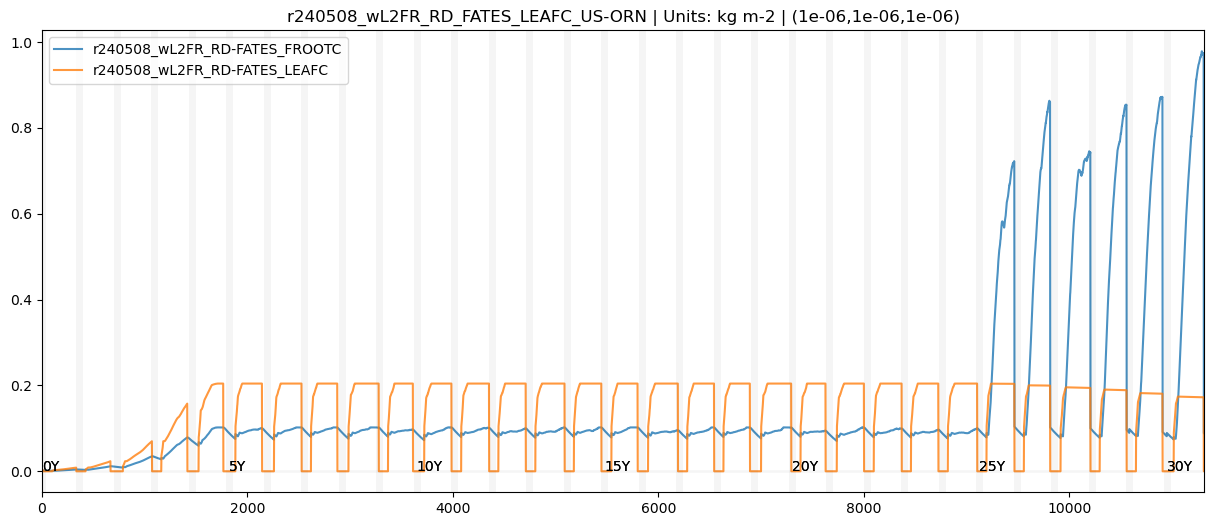

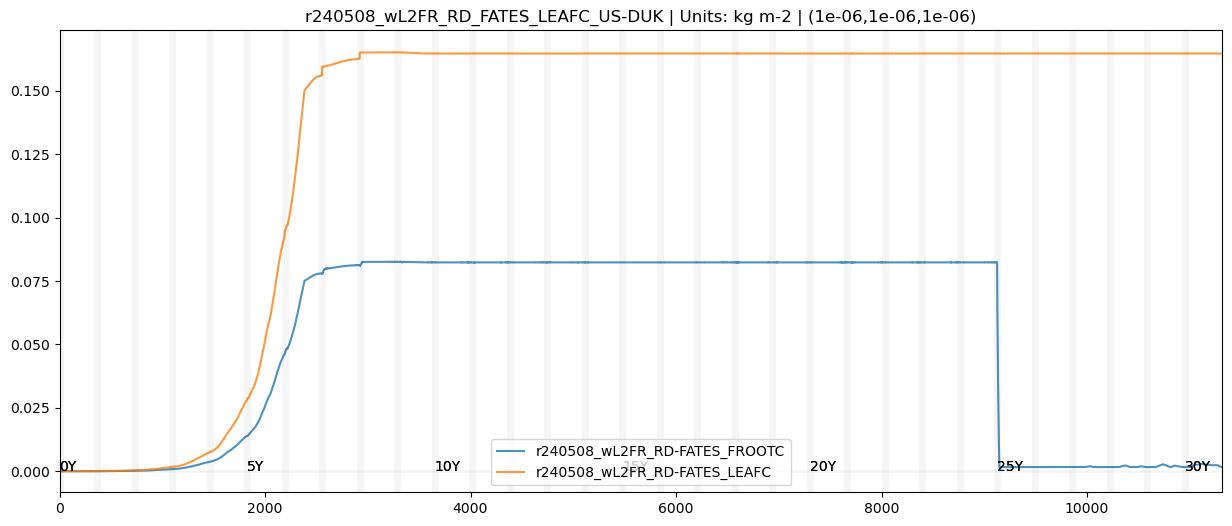

In [25]:
vars = (
    "FATES_FROOTC",
    "FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


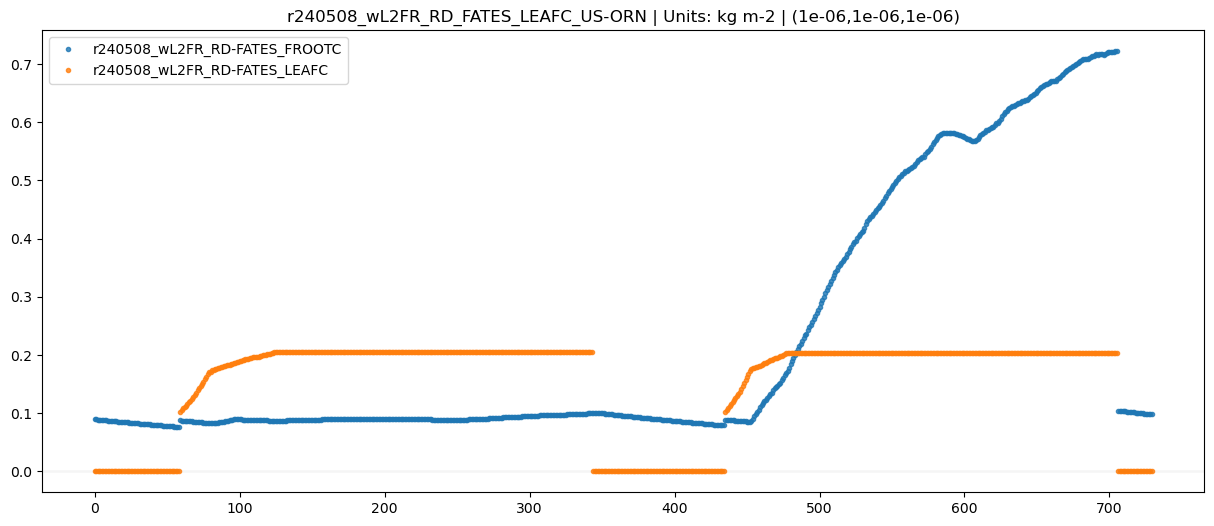

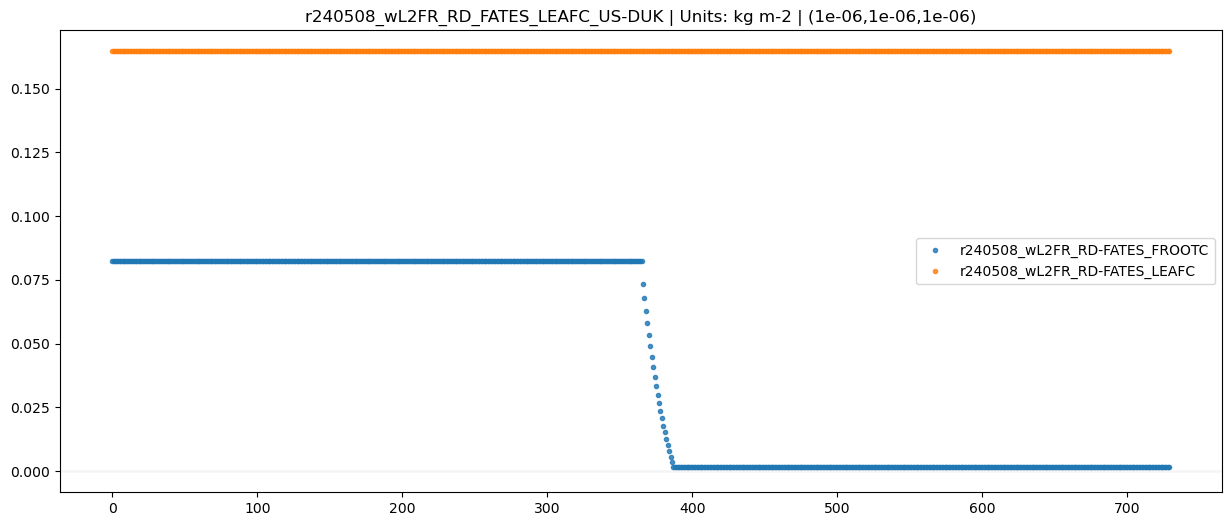

In [26]:
vars = (
    "FATES_FROOTC",
    "FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]][24*365:26*365], '.' , label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #if max_r_years > 0:
            #    plt.xlim(0,max_r_years*365)
            #for i in range(max_r_years):
            #    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
            #    if i%5==0:
            #        plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


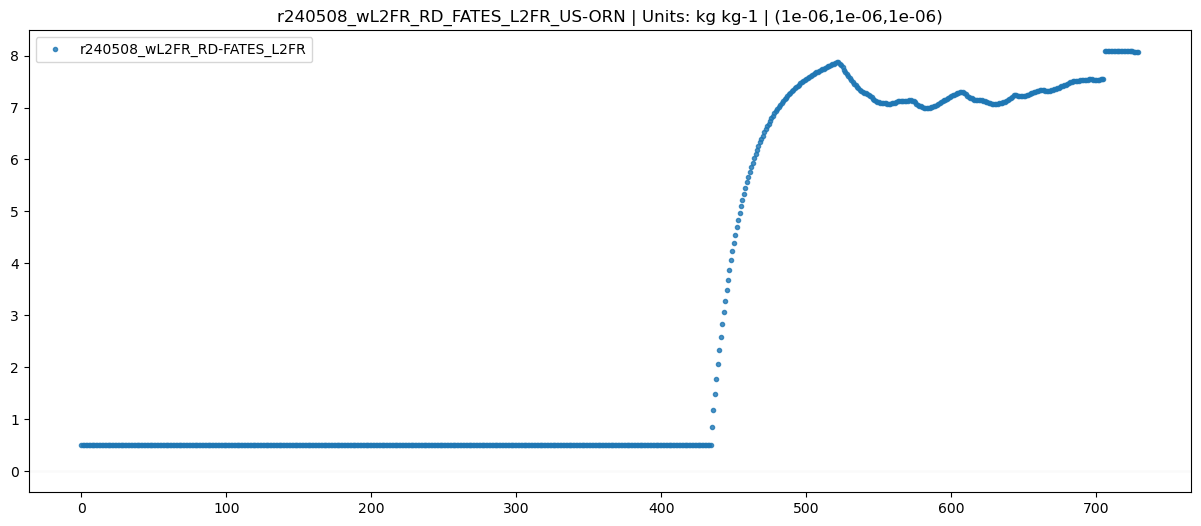

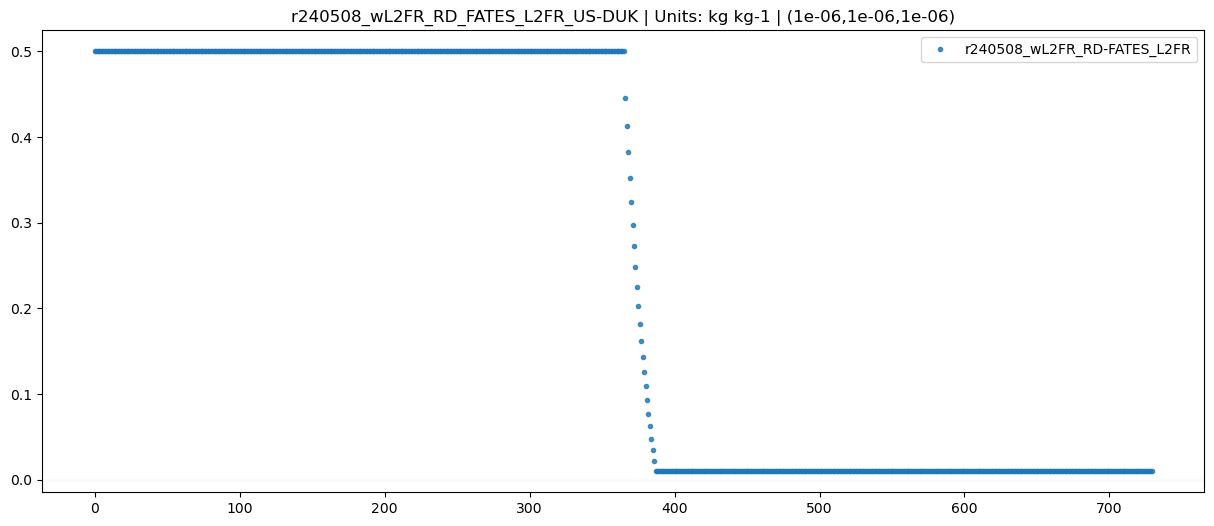

In [27]:
vars = (
    "FATES_L2FR",
    #"FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]][24*365:26*365], '.' , label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #if max_r_years > 0:
            #    plt.xlim(0,max_r_years*365)
            #for i in range(max_r_years):
            #    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
            #    if i%5==0:
            #        plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


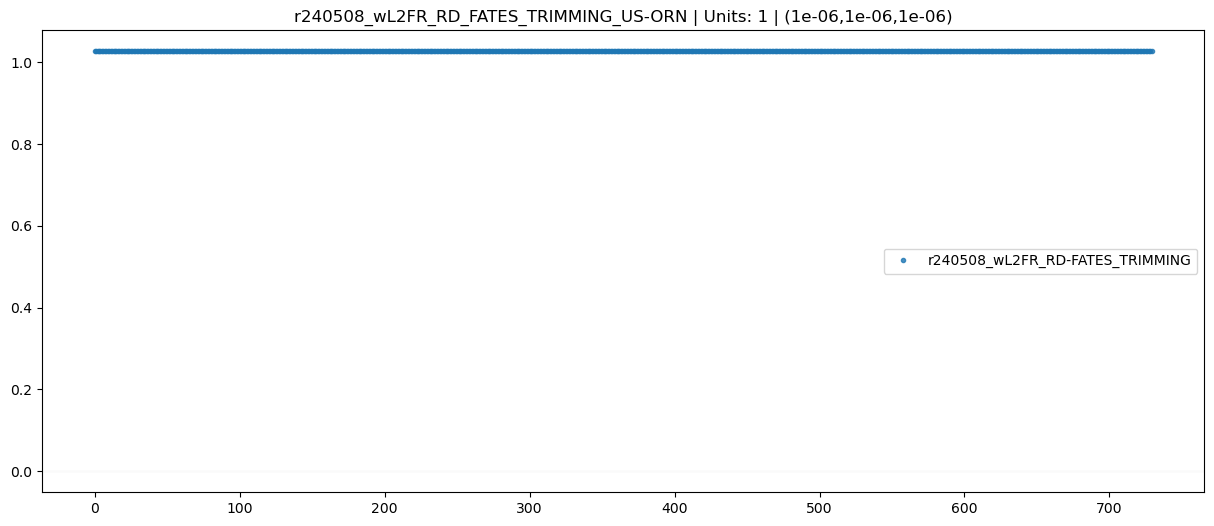

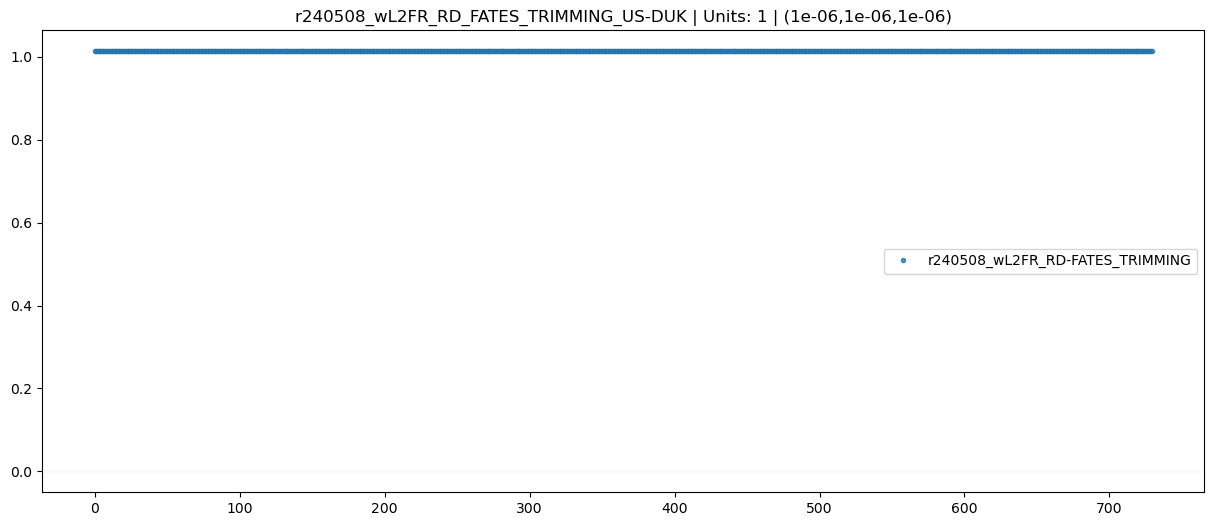

In [28]:
vars = (
    "FATES_TRIMMING",
    #"FATES_LEAFC",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]][24*365:26*365], '.' , label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            #if max_r_years > 0:
            #    plt.xlim(0,max_r_years*365)
            #for i in range(max_r_years):
            #    plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
            #    if i%5==0:
            #        plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


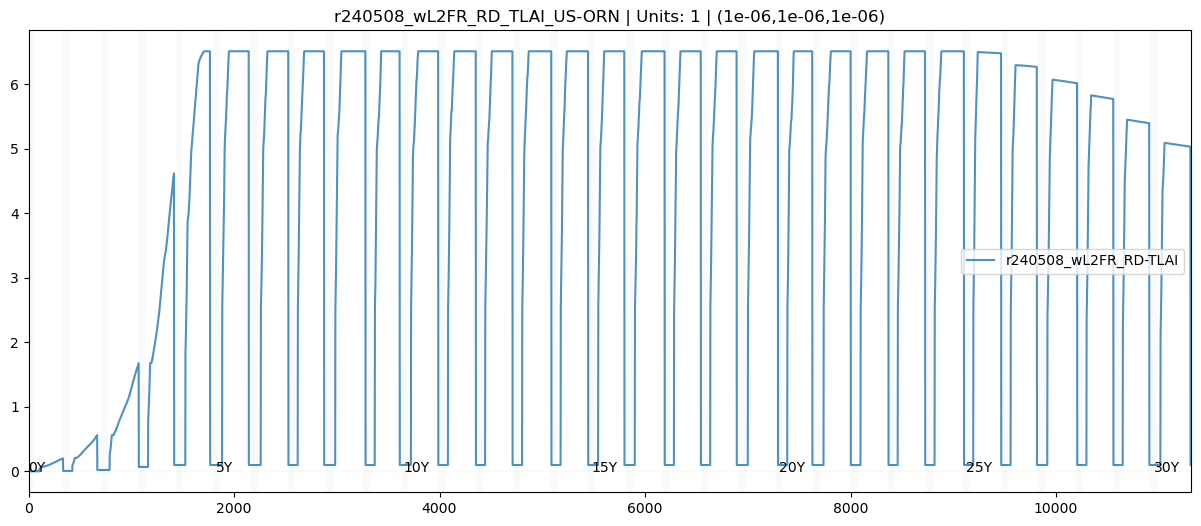

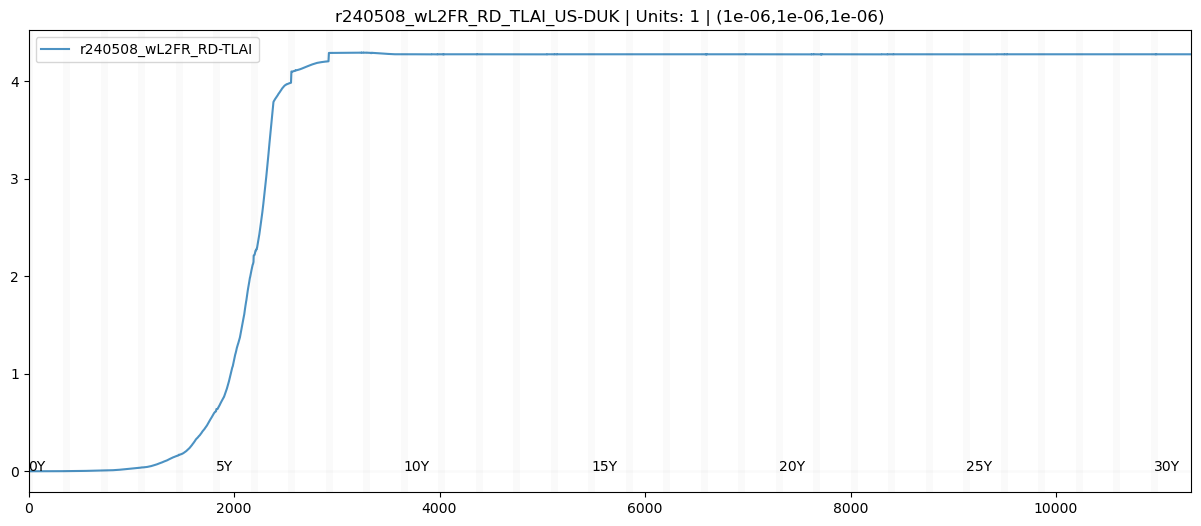

In [29]:
vars = (
    "TLAI",
)

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


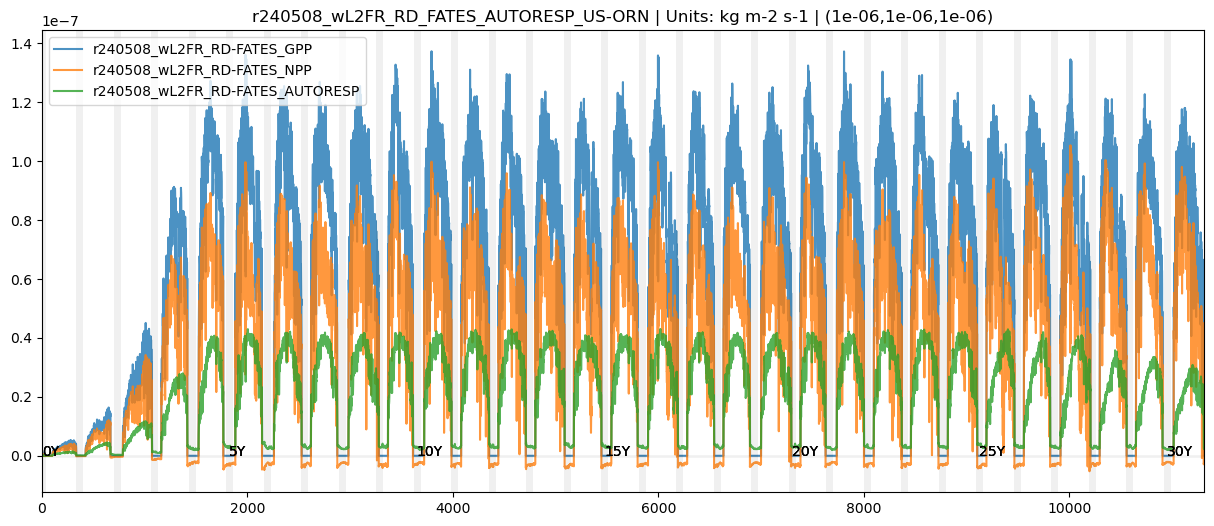

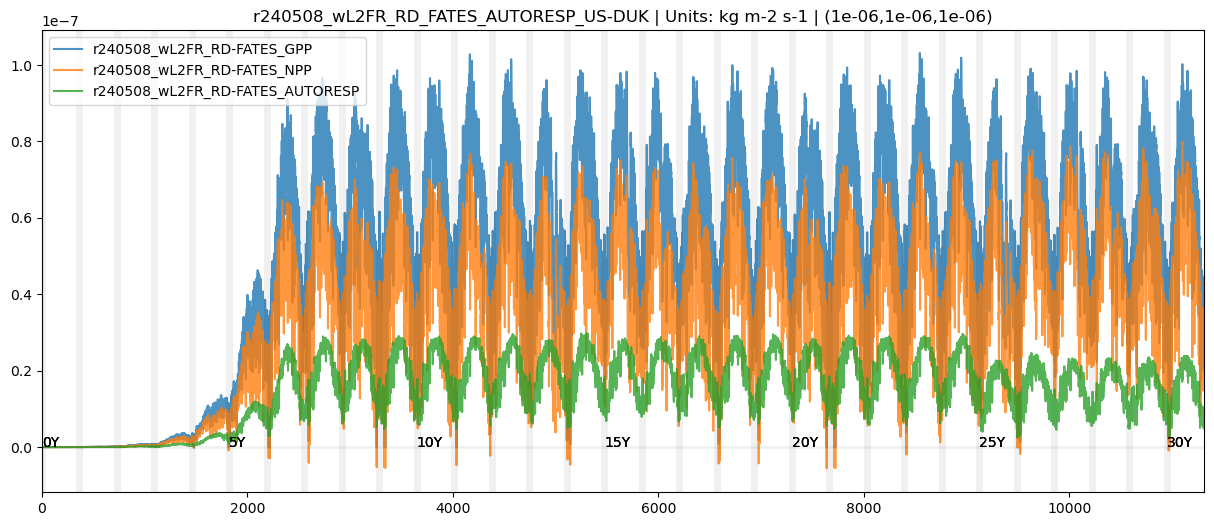

In [30]:
vars = ("FATES_GPP",
        "FATES_NPP",
        "FATES_AUTORESP",
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


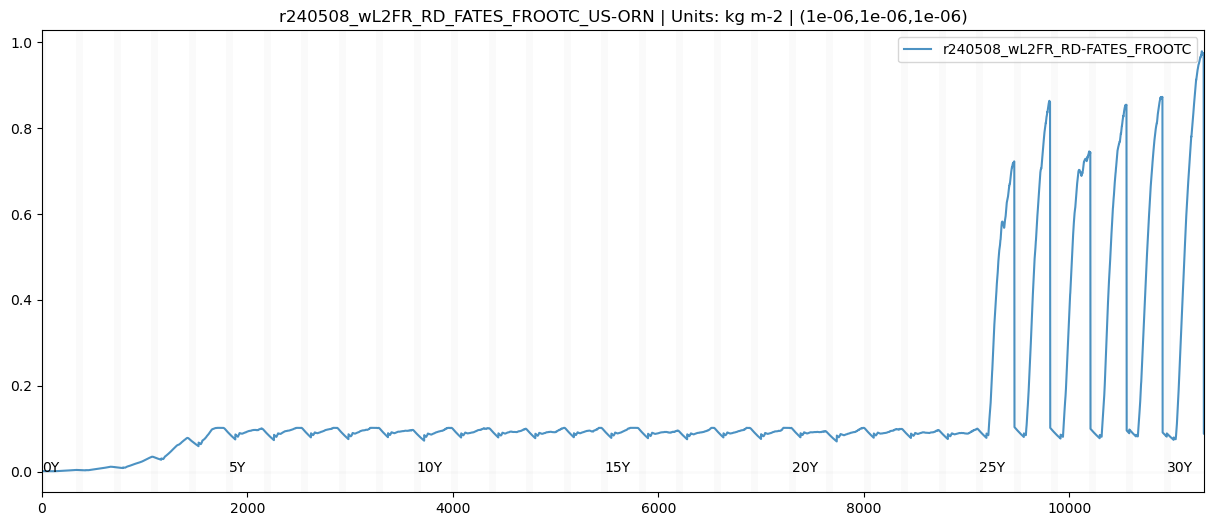

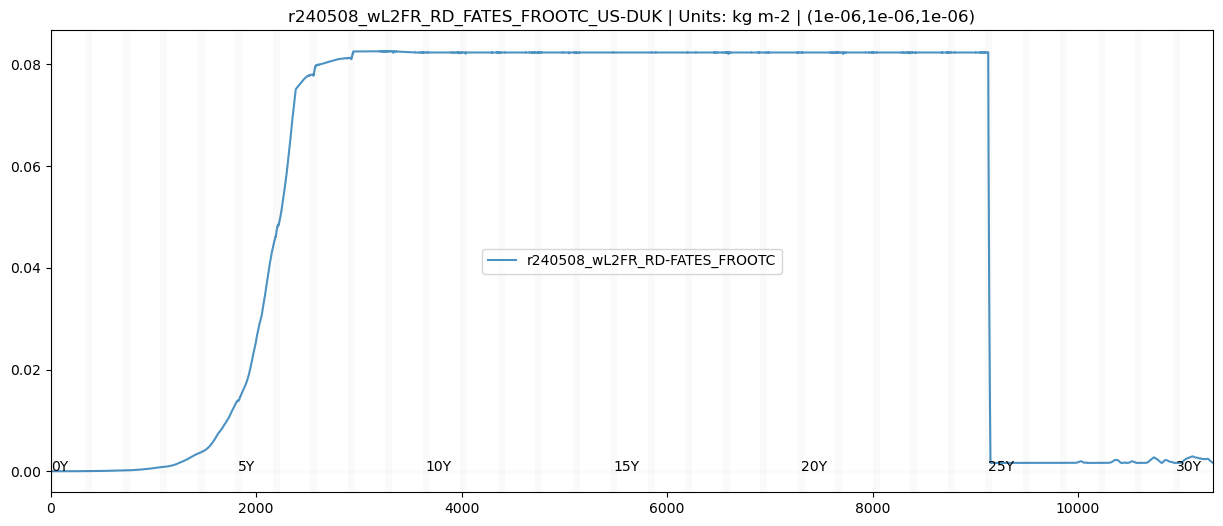

In [31]:
vars = (
            "FATES_FROOTC",
        #"FATES_LEAFC",
        #"FATES_STOREC",
    #"FATES_SAPWOODC",
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


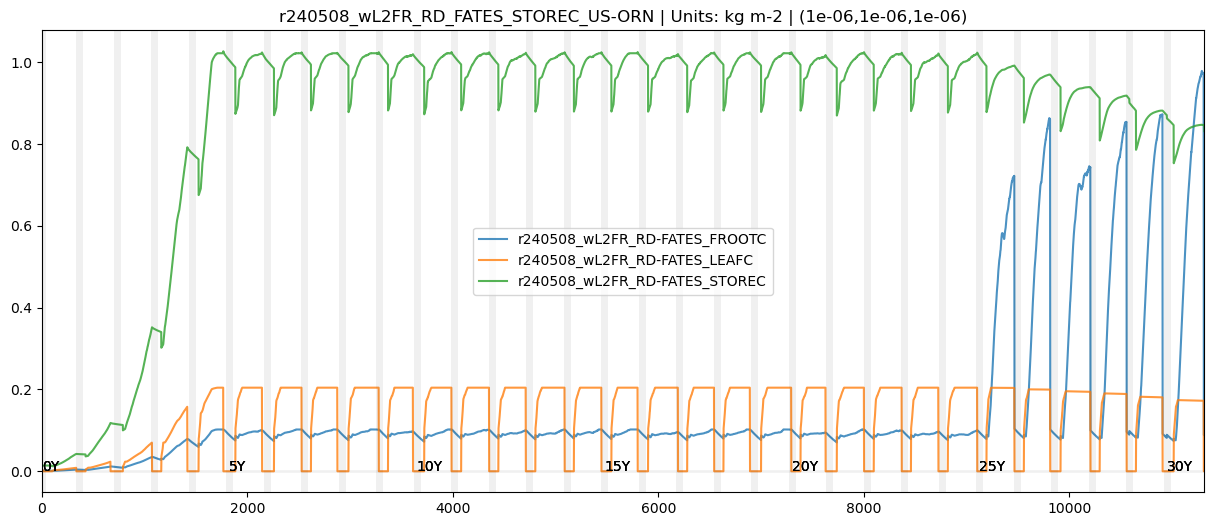

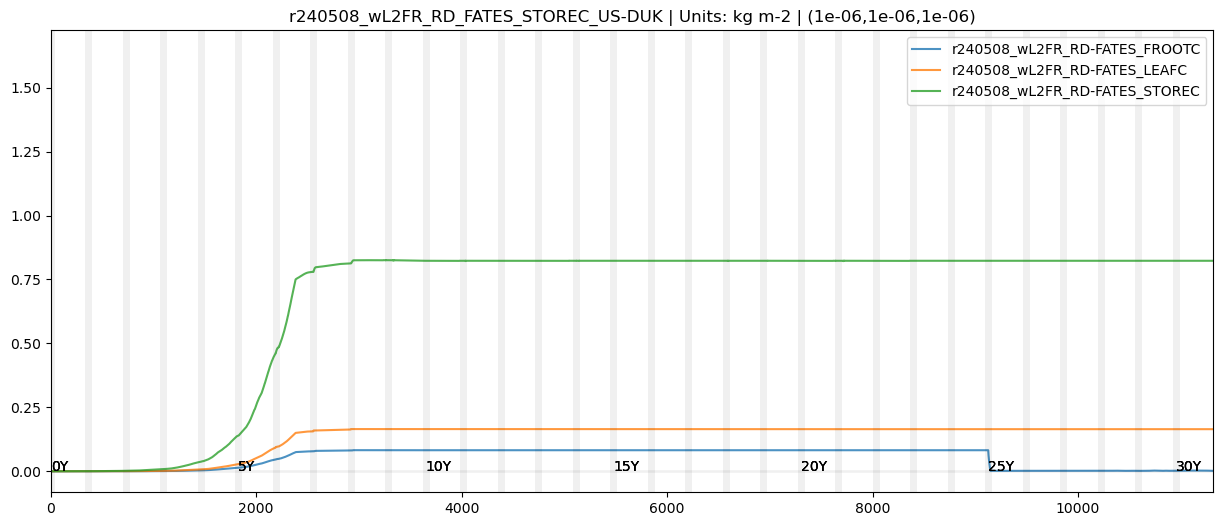

In [32]:
vars = (
            "FATES_FROOTC",
        "FATES_LEAFC",
        "FATES_STOREC",
    #"FATES_SAPWOODC",
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREN_TF : storage N fraction of target
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREN_TF : storage N fraction of target


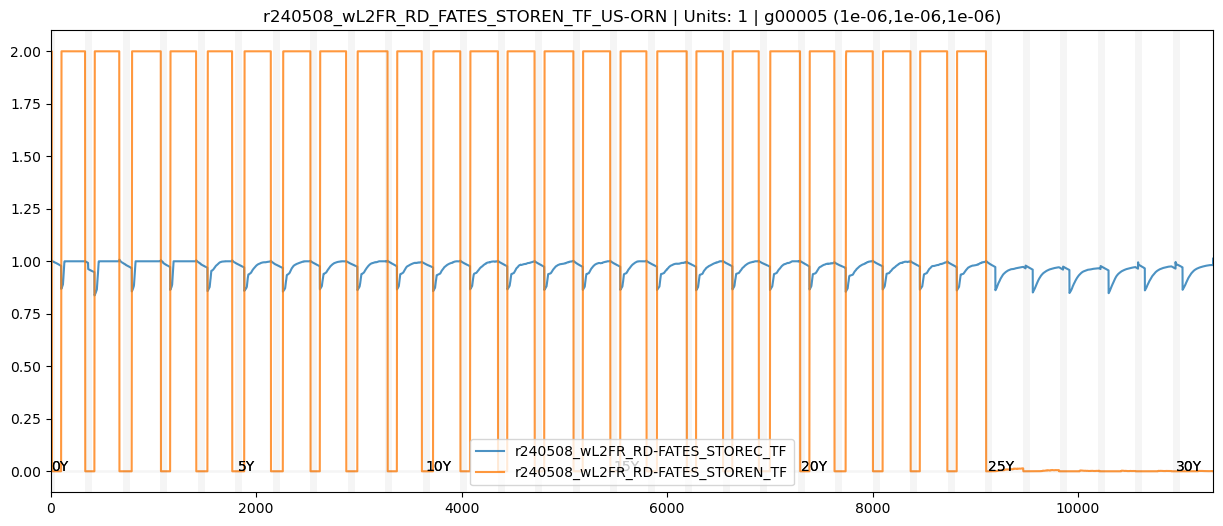

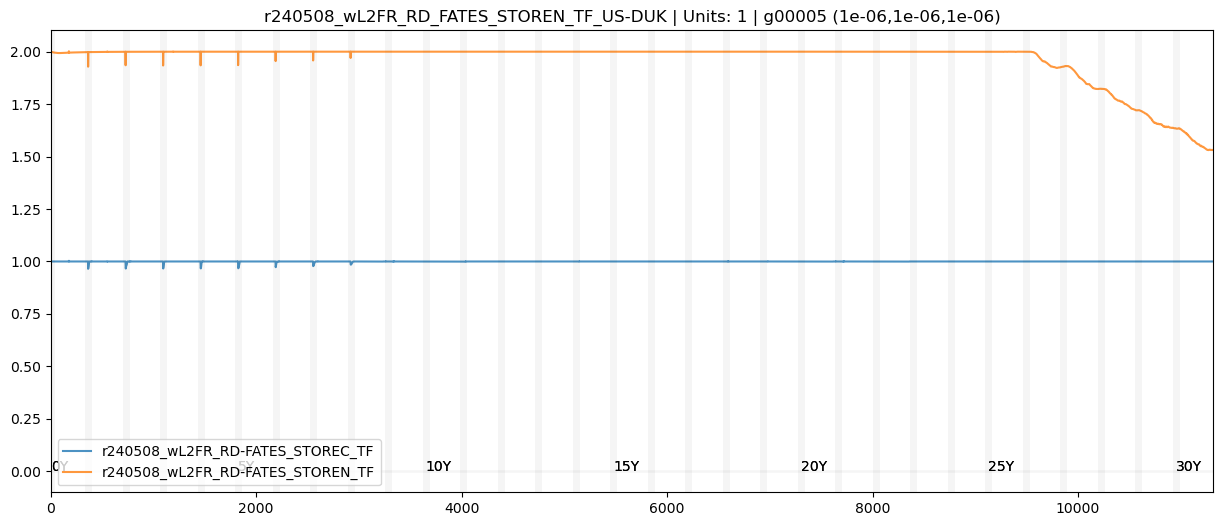

In [33]:
vars = (
        "FATES_STOREC_TF",
        "FATES_STOREN_TF"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage


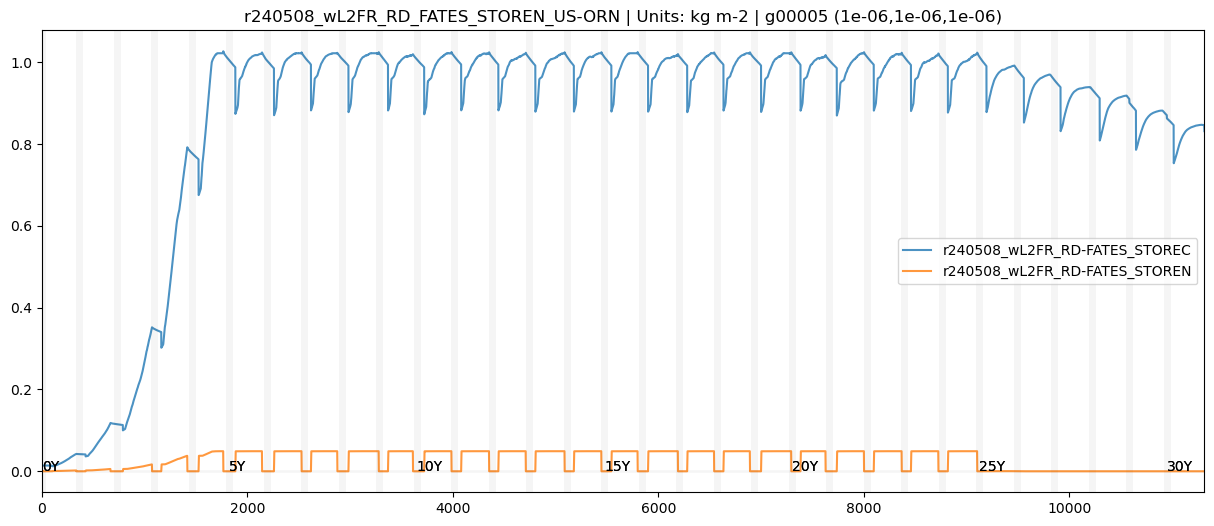

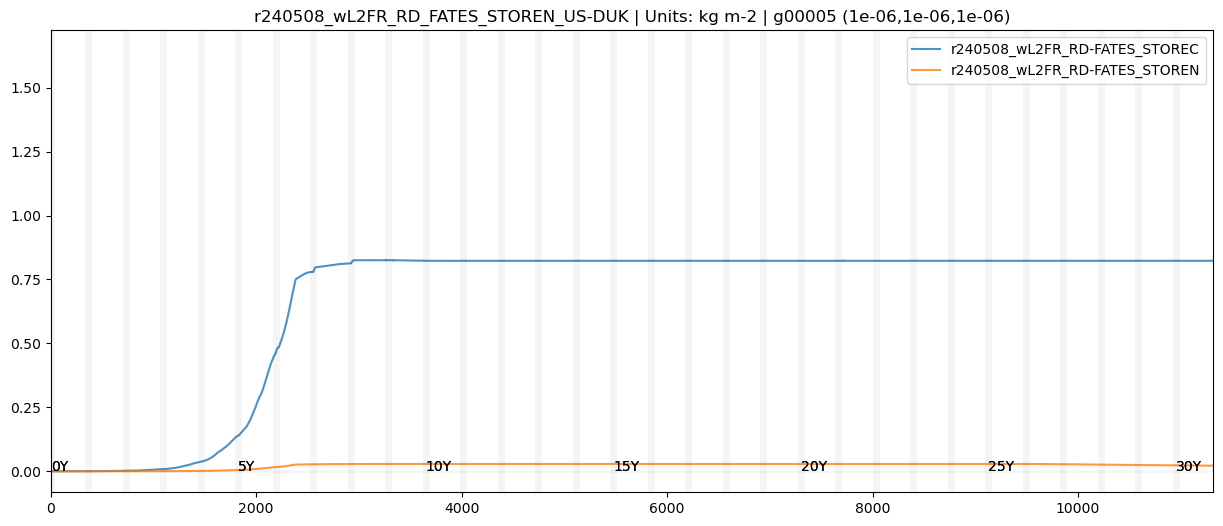

In [35]:
vars = (
        "FATES_STOREC",
        "FATES_STOREN"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join("_".join(vars))}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage
FATES_STOREC : total biomass in live plant storage in kg carbon per m2 land area
FATES_STOREN : total nitrogen in live plant storage


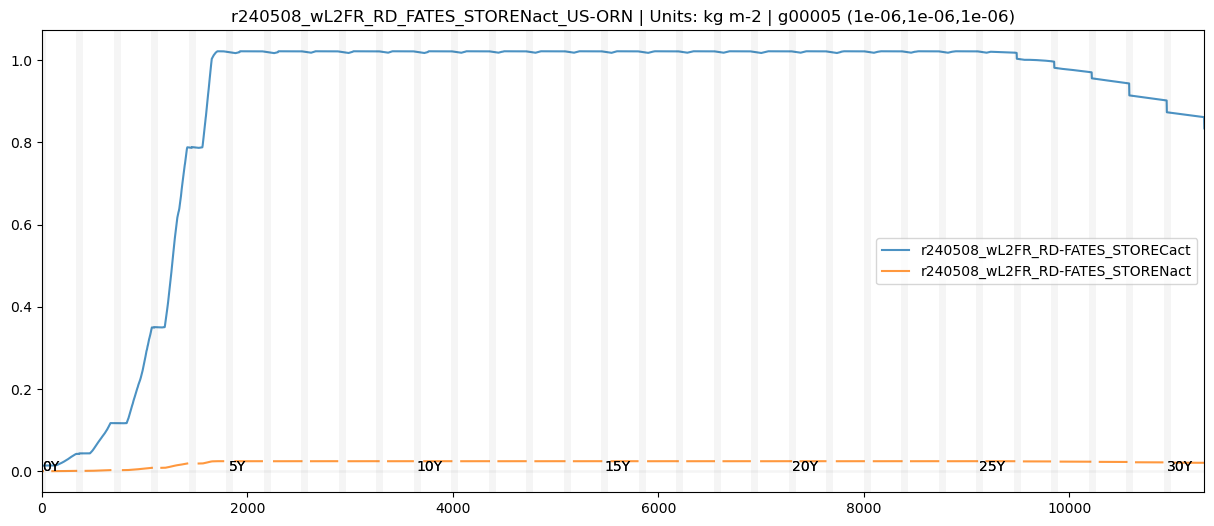

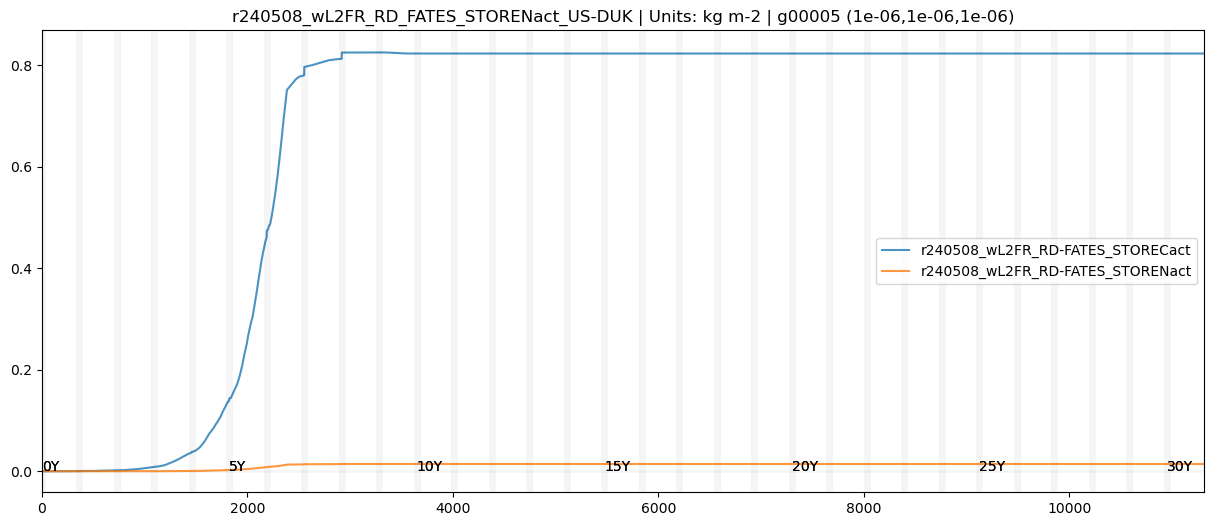

In [48]:
vars = (
        "FATES_STOREC",
        #"FATES_STOREC_TF",
        "FATES_STOREN",
        #"FATES_STOREN_TF"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]]/dict_vars_data[var+'_TF'][site][subset.index[0]],
                     label=f'{tmp_case_name}-{var}act', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}act_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        #plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join("_".join(vars))}_{site}.png")


'DENIT_TF'

FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREP_TF : storage P fraction of target
FATES_STOREC_TF : Storage C fraction of target
FATES_STOREP_TF : storage P fraction of target


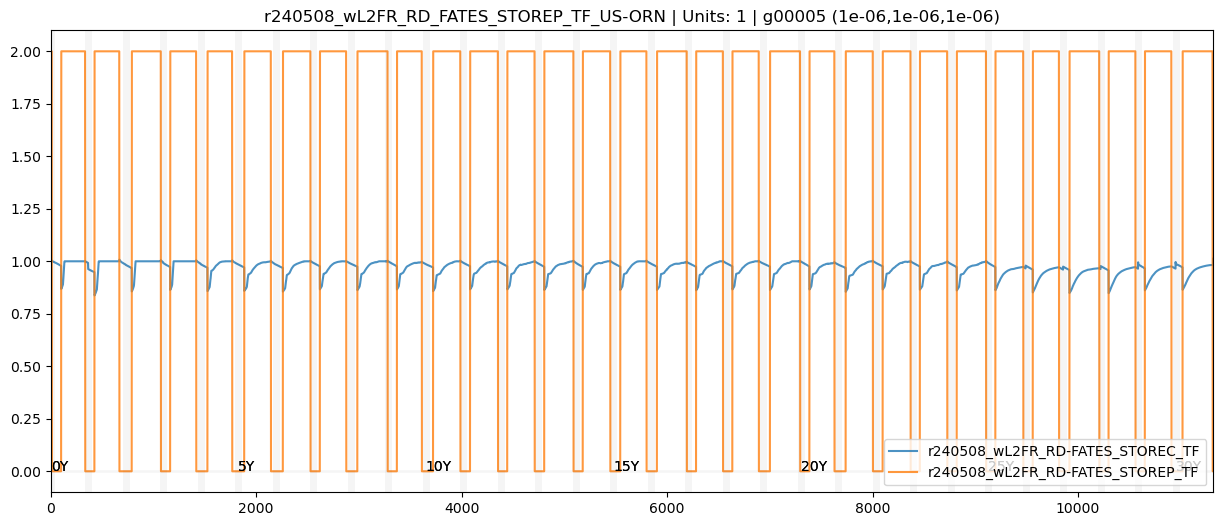

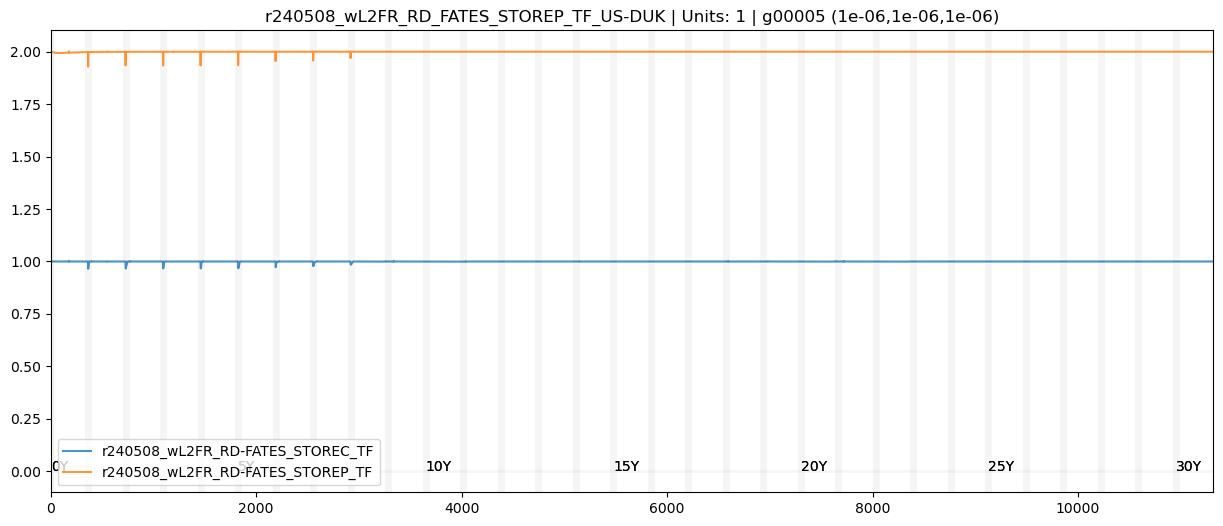

In [36]:
vars = (
        "FATES_STOREC_TF",
        "FATES_STOREP_TF"
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            print (var, ":", dict_vars_data[var][site][subset.index[0]].long_name)
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | {subset.index[0]} ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


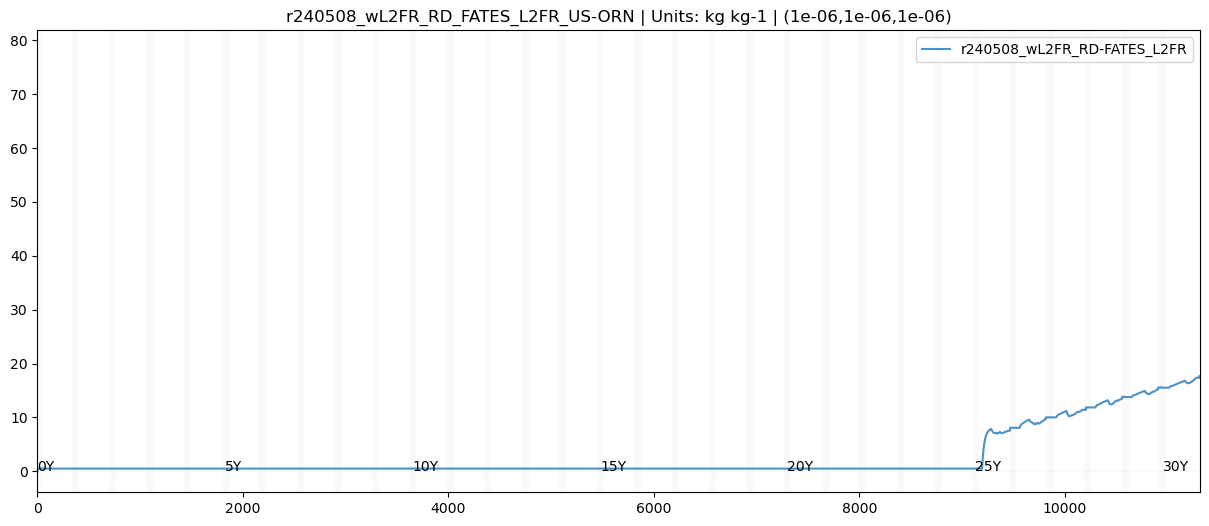

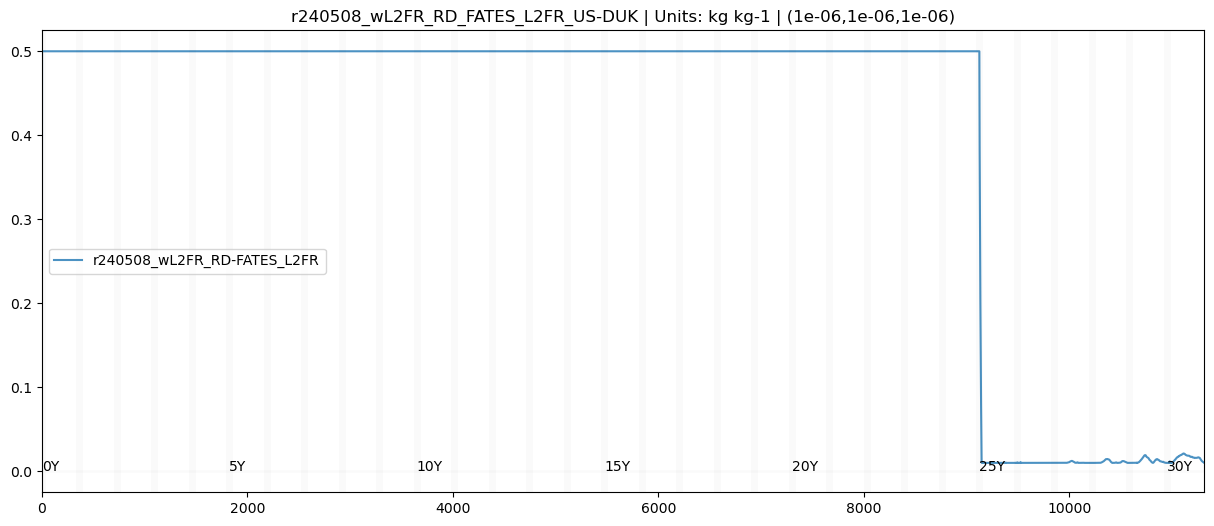

In [37]:

vars = (
        "FATES_L2FR",
        #"FATES_AUTORESP_USTORY"
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


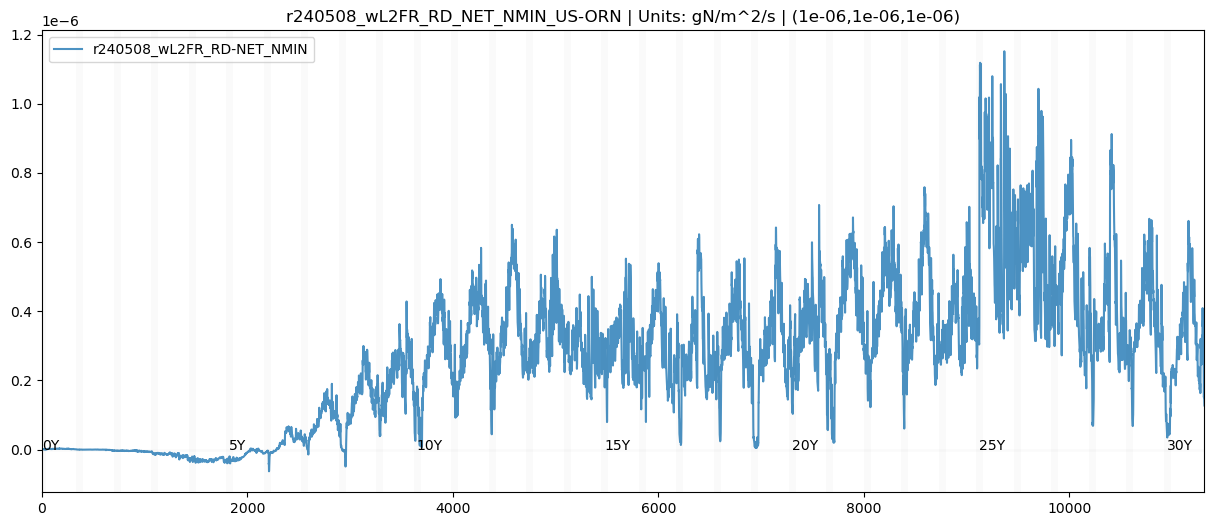

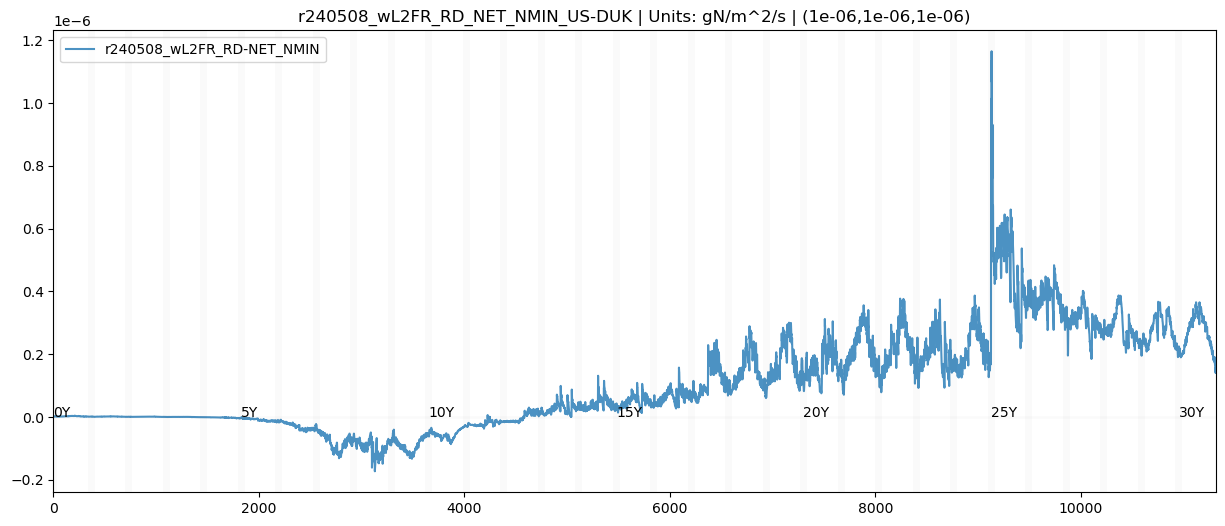

In [38]:

vars = (
        "NET_NMIN",
        #"FATES_AUTORESP_USTORY"
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


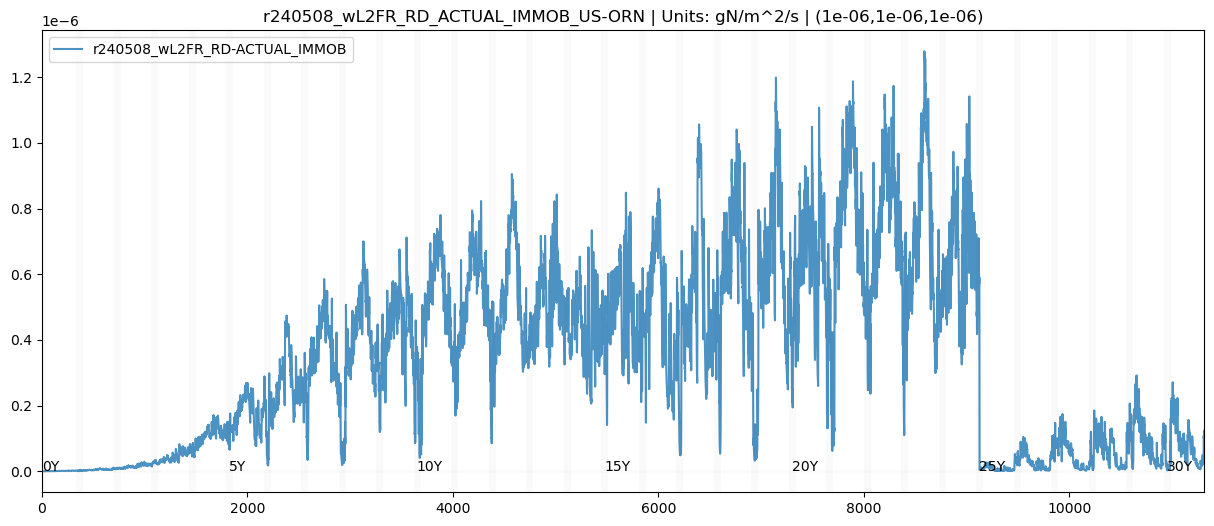

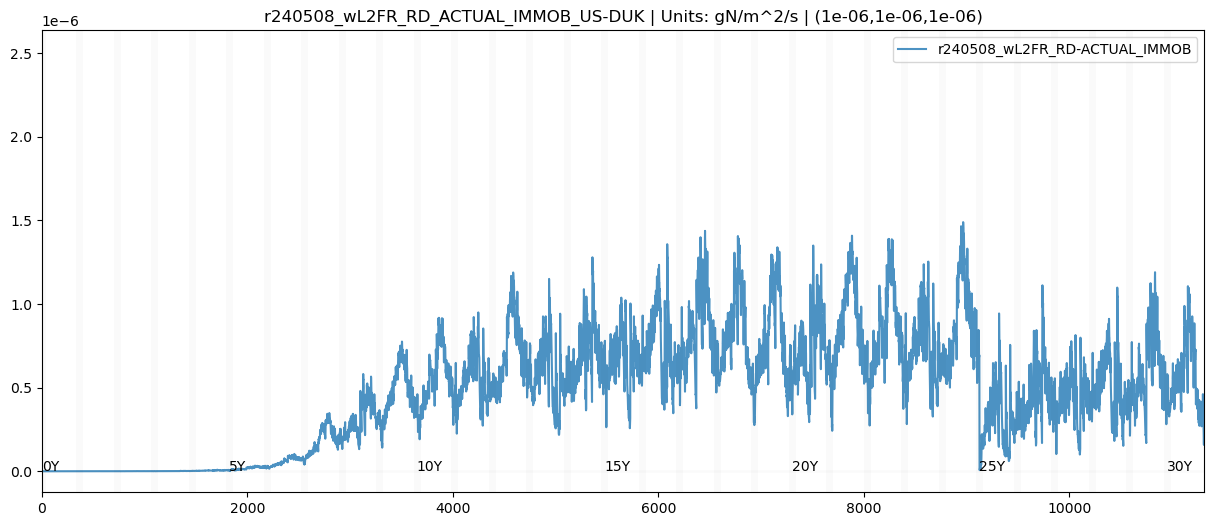

In [39]:
vars = (
        "ACTUAL_IMMOB",
        #"FATES_AUTORESP_USTORY"
       )

subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


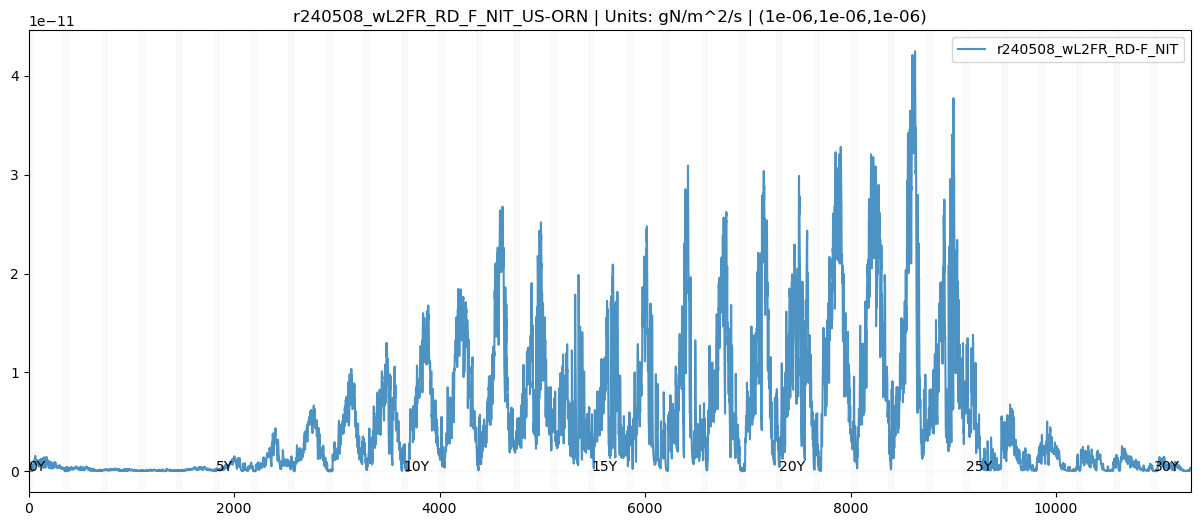

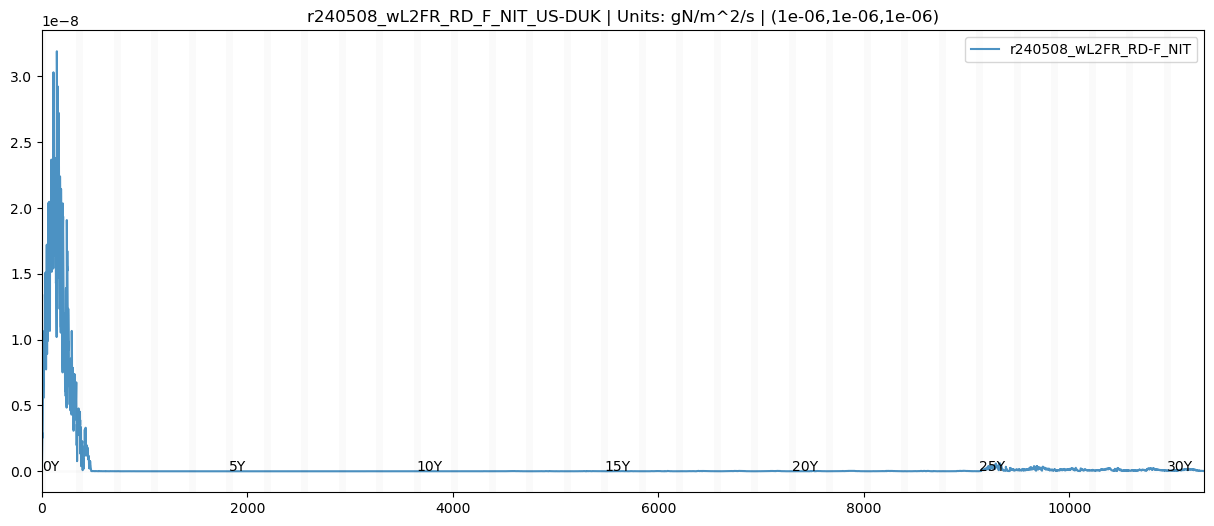

In [40]:

vars = (
        "F_NIT",
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")


FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-ORN_spins_g00005
FACE_1PFT_AllomBl_r240508_wL2FR_CONew_enVmaxD_RD_US-DUK_spins_g00005


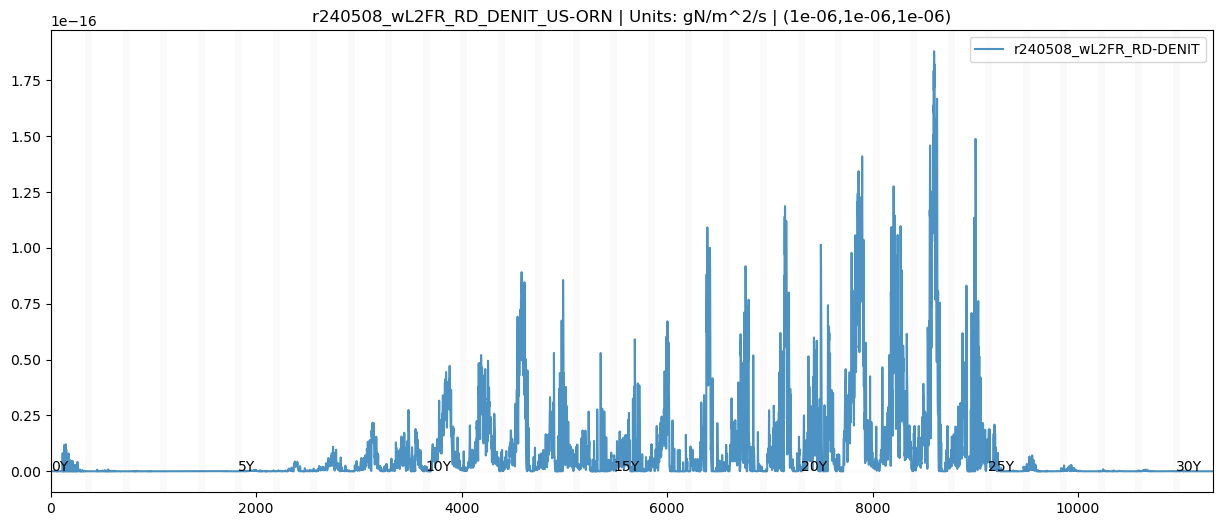

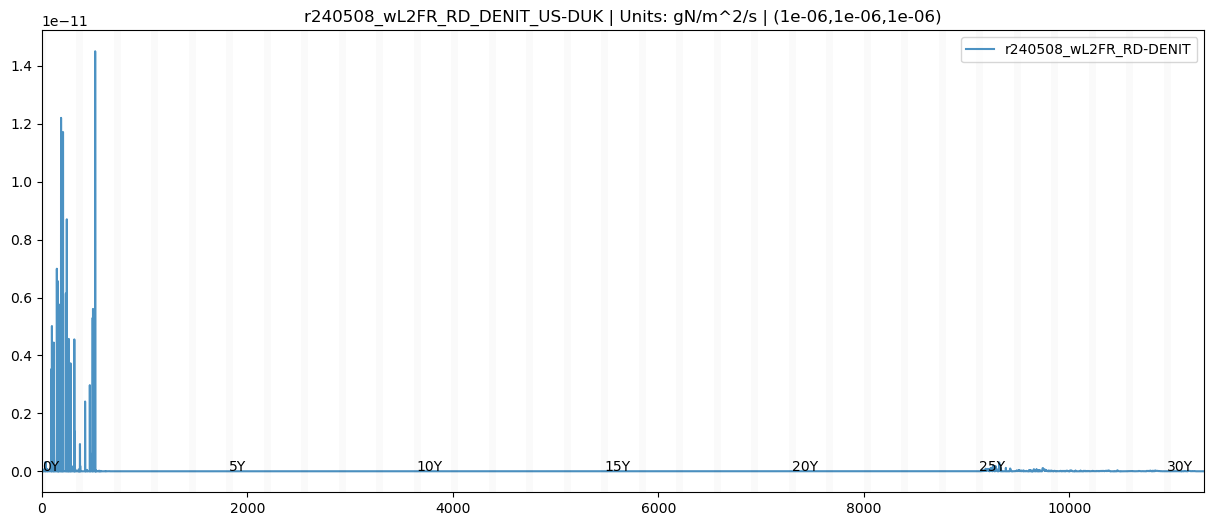

In [41]:

vars = (
        "DENIT",
        #"FATES_AUTORESP_USTORY"
       )


subset = df_params[(df_params[params_list[0]] == selected_p1) &
                   (df_params[params_list[1]] == selected_p2) &
                   (df_params[params_list[2]] == selected_p3)]

for var in vars:
    dict_vars_data[var] = {}
    for site in sites:
        dict_vars_data[var][site]={}
        for key in fnames.keys():
            if (site in key) and (subset.index[0] in key): # Storing the ORNL and Duke data separately
                print (key)
                dict_vars_data[var][site][key.split("_")[-1]]= xr.open_dataset (fnames[key], decode_times=False) [var]



if True:
    for site in sites:
        plt.figure(figsize=(15,6))
        for var in vars:
            plt.plot(dict_vars_data[var][site][subset.index[0]], label=f'{tmp_case_name}-{var}', alpha =0.8)
            plt.title(f"{tmp_case_name}_{var}_{site} | Units: {dict_vars_data[var][site][subset.index[0]].units} | ({selected_p1},{selected_p2},{selected_p3})")
            plt.legend()
            plt.axhline(y = 0, color = 'k',lw=2, alpha=.02)
            if max_r_years > 0:
                plt.xlim(0,max_r_years*365)
            for i in range(max_r_years):
                plt.axvline(x = i*365, color = 'k',lw=5, alpha=.02)
                if i%5==0:
                    plt.text(i*365,0, f"{int(i)}Y")
        plt.savefig(f"{path_save}/TS_all_{tmp_case_name}_{"_".join(vars)}_{site}.png")
